<center> <img src="logo_ifba.jpg" alt="jpg_python" width="100" height="200"> </center>
<br><br>
<div align="center"><span style="font-size: 26px;"><strong>Métodos Matemáticos Para Engenharia <br></strong></span></div> <br>
<center> <img src="python_gif.gif" alt="gif_python" width="80"> </center>


<div style="border: 2px solid black; padding: 10px; width: 95%; background-color: lightgray; display: flex; align-items: center;">
    <h1 style="color: red; text-align: center; margin: auto;">
        Capítulo 3: Séries de Fourier
    </h1>
</div>

<font color='red'></font>
<a href=""></a>

As séries de Fourier são representações de funções através da soma de termos de senos e cossenos. Essas séries são úteis especialmente porque podem descrever funções que não são contínuas ou diferenciáveis em todos os lugares. Os termos trigonométricos utilizados nas séries de Fourier são vantajosos por serem fáceis de diferenciar e integrar, possuírem módulos facilmente calculáveis e cada termo incluir apenas uma frequência característica. Isso é crucial, pois as séries de Fourier são frequentemente aplicadas para analisar a resposta de sistemas a entradas periódicas, com a resposta muitas vezes dependendo do conteúdo de frequência da entrada.

# <div style="margin-top: -20px;">
<hr style="border: 2px solid black;">

<font color='black'><span style="font-size: 22px;"><strong>3.1 Funções Periódicas</strong></span></font>

<hr style="border: 2px solid black;">
</div>

#### <font color='red'> Definição 1 (Função Periódica) </font>

<font color='red'> Uma função $f(x)$ é dita ter período $T$ ou ser periódica com período $T$ se para todo $x$, $f(x+T) = f(x)$, em que $T$ é uma constante positiva. O menor valor de $T > 0$ é chamado de período mínimo ou simplesmente período de $f(x)$.

#### <font color='blue'> Exemplo 1 </font>

<font color='blue'> Verifique quais das funções a seguir são periódicas em $\mathbb{R}$:<br><br>
 a) $f(x) = sen(x)$<br><br>
 b) $g(x) = cos(3x)$<br><br>
 c) $h(x) = x^{2}$<br><br>
 d) $s(x) = 3$

##### <font color='blue'> Solução </font>

<font color='blue'> a) Note que $sen(x + 2\pi) = sen(x)$ para todo $x \in \mathbb{R}$. Assim, $f(x) = sen(x)$ é periódica com período $T = 2\pi$.<br><br>
 b) Para que $g(x) = cos(3x)$ seja periódica devemos obter $T$ tal que $cos(3(x+T)) = cos(3x)$. Note que $cos(3(x+T)) = cos(3x + 3T)$ donde segue que $3T$ necessita ser múltiplo de $2\pi$. Assim, $3T = 2\pi \Rightarrow T = \frac{2\pi}{3}$. Note que $cos\left(3\left(x + \frac{2\pi}{3}\right)\right) = cos(3x + 2\pi) = cos(3x)$. Como $cos(x + 2\pi) = cos(x)$ (análogamente ao $sen(x)$), temos que $cos(3x)$ é periódica.<br><br>
 c) Suponhamos que exista $T$ tal que $h(x + T) = h(x)$. Pois bem,<br><br>
 $$h(x+T) = h(x) \Rightarrow (x+T)^{2} = x^{2} \Rightarrow x^{2} + 2xT + T^{2} = x^{2} \Rightarrow 2xT + T^{2} = 0 \Rightarrow T = 0 \ \text{ou} \ x = -\frac{T}{2}$$<br><br>
 Note que esta equação deveria ser válida para $T > 0$ e todo $x$ e não somente $x = -\frac{T}{2}$. Portanto, $h(x) = x^{2}$ não é periódica.<br><br>
 d) Note que $s(x) = 3$ é tal que $s(x + T) = s(x)$ para todo $T \in \mathbb{R}$. Portanto, $s(x)$ é periódica com período $T$ qualquer.

#### <font color='blue'> Exemplo 2</font>

<font color='blue'> Faça o gráfico de cada uma das seguintes funções:<br><br>
a) $f(x) = \left\{ \begin{array}{}
3 &  \ \ \ 0 < x < 5 \\
 0 & -5 < x < 0 \end{array}\right. \ \ \ T = 10$ <br><br>
 b) $g(x) = \left\{ \begin{array}{}
  sen(x) &  \ \ \ 0 < x < \pi \\ 
  \ \ \ 0 & \ \ \ \pi < x < 2\pi \end{array}\right. \ \ \ T = 2\pi$<br><br>
    c) $h(x) = x^{2}, \ 0\leq x \leq 2\pi, \ T = 2\pi$<br><br>
    d) $k(x) = x^{2}, \ -\pi \leq x \leq \pi, \ T = 2\pi$<br><br>
    e) $r(x) = x, \ -\pi \leq x \leq \pi, \ T = 2\pi$<br><br>
    f) $s(x) = |x|, \ -\pi \leq x \leq \pi, \ T = 2\pi$

##### <font color='blue'> Solução </font>

<font color='blue'> Optamos por apresentar os gráficos via código Python. Todos eles serão bastante importantes neste capítulo. Faça um esforço para entender cada código uma vez que tais gráficos são parte essencial dos exemplos que se seguirão.<br><br>
 <font color='blue'> Em princípio vamos definir cada uma das funções:

In [1]:
import numpy as np

# Definindo f
def f(x):
    x = ((x + 5) % 10) - 5 # Normalizar x para o intervalo [-5, 5)
    if -5 < x < 0:
        return 0
    elif 0 < x < 5:
        return 3
    else:
        # Trata o caso das bordas onde x é exatamente -5 ou 5, que não deve acontecer após a normalização
        return 1.5 # Escolhemos a média de 0 e 3
    
# Domínio e imagem de f (ajuste para ver o gráfico a seguir em mais ou menos pontos)    
x_values_f = np.linspace(-15, 15, 400)
y_values_f = [f(x) for x in x_values_f]


# Definindo g
def g(x):
    x = x % (2 * np.pi)
    if 0 < x < np.pi:
        return np.sin(x)
    else:
        return 0
    
# Domínio e imagem de g     
x_values_g = np.linspace(-4 * np.pi, 4 * np.pi, 400)
y_values_g = [g(x) for x in x_values_g]


# Definindo h    
def h(x):
    x = x % (2 * np.pi)
    return x**2

# Domínio e imagem de h
x_values_h = np.linspace(-4 * np.pi, 4 * np.pi, 800)
y_values_h = [h(x) for x in x_values_h]


# Definindo k
def k(x):
    x = (x + np.pi) % (2 * np.pi) - np.pi
    return x**2

# Domínio e imagem de k
x_values_k = np.linspace(-4 * np.pi, 4 * np.pi, 800)
y_values_k = [k(x) for x in x_values_k]


# Definindo r
def r(x):
    x = (x + np.pi) % (2 * np.pi) - np.pi
    return x

# Domínio e imagem de r
x_values_r = np.linspace(-4 * np.pi, 4 * np.pi, 800)
y_values_r = [r(x) for x in x_values_r]


# Definindo s
def s(x):
    x = (x + np.pi) % (2 * np.pi) - np.pi
    return abs(x)

# Domínio e imagem de s
x_values_s = np.linspace(-4 * np.pi, 4 * np.pi, 800)
y_values_s = [s(x) for x in x_values_s]

<font color='blue'> Agora vejamos os gráficos:

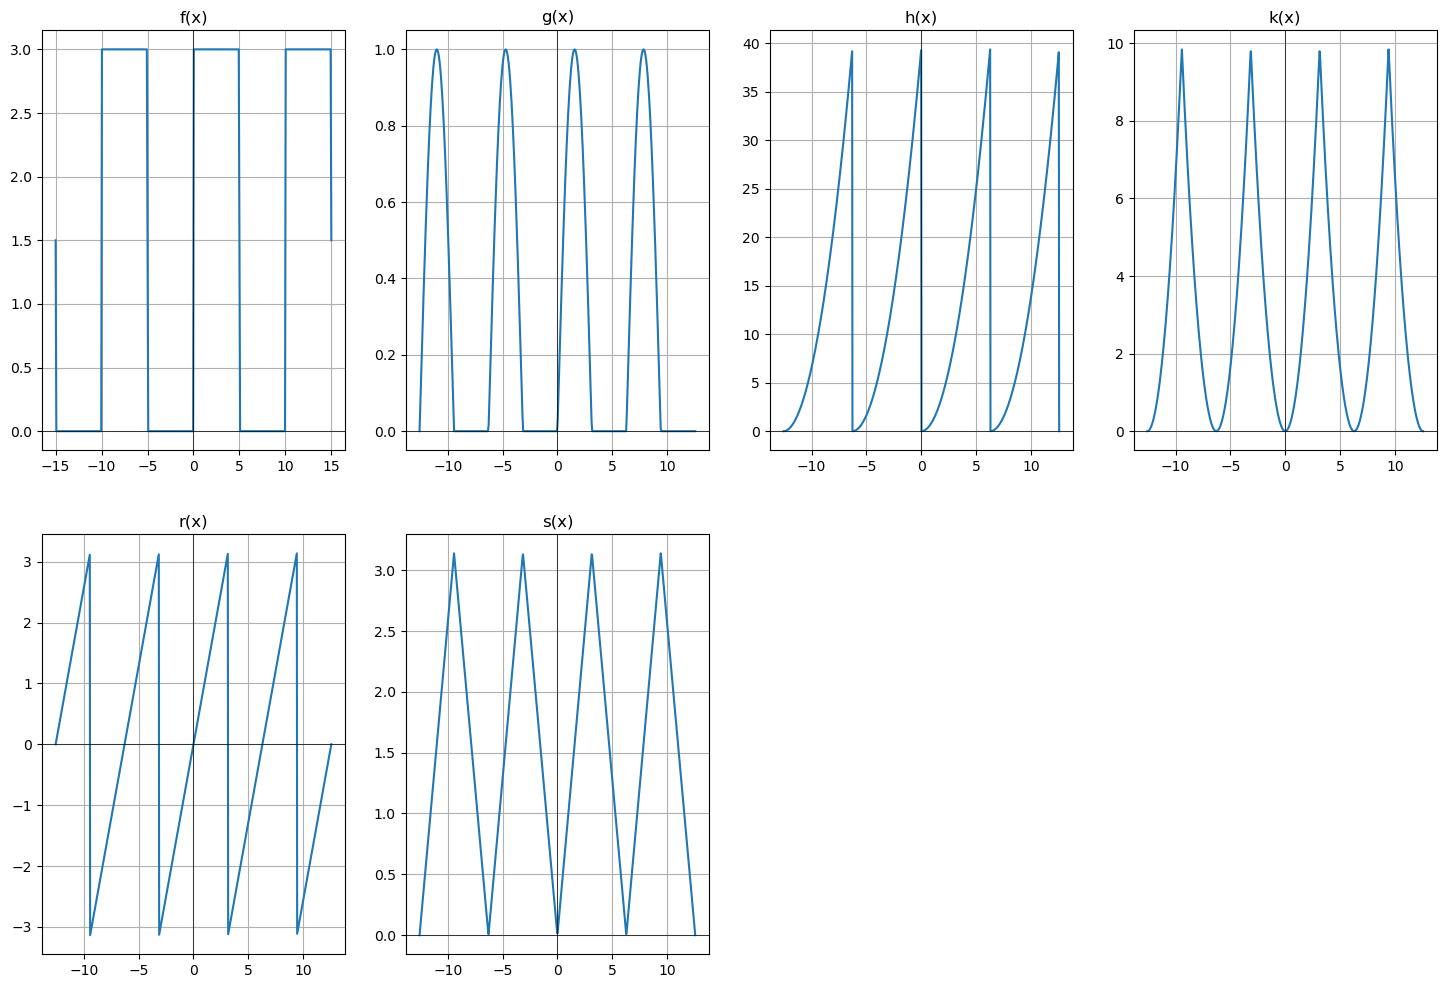

In [2]:
# Gerar gráficos
import matplotlib.pyplot as plt


plt.figure(figsize=(18, 12))

# plot de f
plt.subplot(2, 4, 1)
plt.plot(x_values_f, y_values_f)
plt.title('f(x)')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)

# plot de g
plt.subplot(2, 4, 2)
plt.plot(x_values_g, y_values_g)
plt.title('g(x)')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)

# plot de h
plt.subplot(2, 4, 3)
plt.plot(x_values_h, y_values_h)
plt.title('h(x)')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)

# plot de k
plt.subplot(2, 4, 4)
plt.plot(x_values_k, y_values_k)
plt.title('k(x)')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)

# plot de r
plt.subplot(2, 4, 5)
plt.plot(x_values_r, y_values_r)
plt.title('r(x)')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)

# plot de s
plt.subplot(2, 4, 6)
plt.plot(x_values_s, y_values_s)
plt.title('s(x)')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)

<font color='blue'> Sendo estes, gráficos simples, recomendados esboçá-los, também a mão.

# <div style="margin-top: -20px;">
<hr style="border: 2px solid black;">

<font color='black'><span style="font-size: 22px;"><strong>3.2 Série de Fourier</strong></span></font>

<hr style="border: 2px solid black;">
</div>

#### A Série de Fourier

Seja $f$ uma função definida, no intervalo $(-L,L)$ e fora dele, por $f(x+2L) = f(x)$, isto é, adimitamos que $f(x)$ tem período $2L$. A série de Fourier correspondente a $f(x)$ é dada por:

<font color='red'>$$\frac{a_{0}}{2} + \sum_{n=1}^{\infty} \left(a_{n}cos\left(\frac{n\pi x}{L}\right) + b_{n}sen\left(\frac{n\pi x}{L}\right) \right) \tag{1}$$</font>

em que os coeficientes de Fourier $a_{n}$ e $b_{n}$ são:

<font color='red'>$$\left\{ \begin{array}{}
 a_{n}  =  \frac{1}{L} \int_{-L}^{L} f(x)cos\left(\frac{n\pi x}{L}\right) dx \\
 b_{n}  =  \frac{1}{L} \int_{-L}^{L} f(x)sen\left(\frac{n\pi x}{L}\right) dx \end{array}\right. \ \ \ n = 0,1,2,... \tag{2}$$</font>
 
Se $f(x)$ tem período $2L$, podemos determinar os coeficientes $a_{n}$ e $b_{n}$, da seguinte forma:

<font color='red'>$$\left\{ \begin{array}{}
 a_{n}  =  \frac{1}{L} \int_{c}^{c+2L} f(x)cos\left(\frac{n\pi x}{L}\right) dx \\
 b_{n}  =  \frac{1}{L} \int_{c}^{c+2L} f(x)sen\left(\frac{n\pi x}{L}\right) dx \end{array}\right. \ \ \ n = 0,1,2,... \tag{3}$$</font>
 
em que $c$ é um número real qualquer. Tomando $c = -L$ podemos mostrar que 

<font color='red'>$$a_{0} = \frac{1}{L}\int_{-L}^{L} f(x) dx \tag{4}.$$

Note que $\frac{a_{0}}{2}$ é o valor médio de $f(x)$ durante um período.

No próximo exemplo utizaremos a série de Fourier para aproximar a função:

$$f(x) = \left\{ \begin{array}{}
 3 &  0 < x < 5 \\
 0 & -5 < x < 0 \end{array}\right. \ \ \ T = 10$$<br>
 
<img src="fig1_9.png" alt="jpg_python" width="800" height="">

#### <font color='blue'> Exemplo 3 </font>

<font color='blue'> Considere a função<br><br>
 $$f(x) = \left\{ \begin{array}{}
 3 &  0 < x < 5 \\
 0 & -5 < x < 0 \end{array}\right. \ \ \ T = 10$$<br>
 a) Encontre os coeficientes de Fourier correspondente à função dada;<br><br>
 b) Escreva os primeiros termos da série de Fourier correspondente.

##### <font color='blue'> Solução </font>

<font color='blue'> a) Temos que $c = -5$ e $T = 2L = 10 \Rightarrow L = 5$. Assim,<br><br>
 $$a_{n} = \frac{1}{L} \int_{c}^{c+2L} f(x) cos\left(\frac{n\pi x}{L}\right) dx = \frac{1}{5}  \int_{-5}^{-5+2\cdot5} f(x)cos\left(\frac{n\pi x}{5}\right) dx = $$<br>
 $$= \frac{1}{5}\left(\int_{-5}^{0}0\cdot cos\left(\frac{n\pi x}{5}\right) dx + \int_{0}^{5}3 cos\left(\frac{n\pi x}{5}\right)\right) dx = $$<br>
 $$= \frac{3}{5}\int_{0}^{5} cos\left(\frac{n\pi x}{5}\right) dx = \frac{3}{5}\left(\frac{5}{n\pi}sen\left(\frac{n\pi x}{5}\right)\right)_{0}^{5} = $$<br>
 $$\frac{3}{n\pi}\left(sen\left(\frac{n\pi5}{5}\right) - sen\left(\frac{n\pi0}{5}\right)\right) = \frac{3}{n\pi}\left(sen(n\pi) - sen(0)\right) = 0, \ \ n\neq 0 \Rightarrow (0,0,0,\ldots,0)$$<br>
 Se $n = 0$, temos que<br><br>
 $$a_{0} = \frac{1}{5}\int_{-5}^{5}f(x) dx = \frac{1}{5} \left(\int_{-5}^{0} 0 dx + \int_{0}^{5} 3 dx\right) = \frac{3}{5}\int_{0}^{5} dx = \frac{3}{5}x|_{0}^{5} = 3$$<br>
 $$b_{n} = \frac{1}{L} \int_{c}^{c+2L} f(x) sen\left(\frac{n\pi x}{L}\right) dx = \frac{1}{5}  \int_{-5}^{-5+2\cdot5} f(x)sen\left(\frac{n\pi x}{5}\right) dx = $$<br>
 $$= \frac{1}{5}\left(\int_{-5}^{0}0\cdot sen\left(\frac{n\pi x}{5}\right) dx + \int_{0}^{5}3 sen\left(\frac{n\pi x}{5}\right)\right) dx = $$<br>
 $$= \frac{3}{5}\int_{0}^{5} sen\left(\frac{n\pi x}{5}\right) dx = \frac{3}{5}\left(-\frac{5}{n\pi}cos\left(\frac{n\pi x}{5}\right)\right)_{0}^{5}=$$<br>
 $$= -\frac{3}{n\pi}\left(cos\left(\frac{n\pi5}{5}\right) - cos\left(\frac{n\pi0}{5}\right) \right) = -\frac{3}{n\pi}(cos(n\pi)-cos(0)) = \frac{3}{n\pi}(1 - cos(n\pi)) =$$<br>
 $$ = \left(\frac{3}{\pi}(1-(-1)),\frac{3}{2\pi}(1-1),\frac{3}{3\pi}(1-(-1)), \frac{3}{4\pi}(1-1), \frac{3}{5\pi}(1-(-1)),...\right) =$$<br>
 $$= \left(\frac{3}{\pi}\cdot2,\frac{3}{2\pi}\cdot0,\frac{3}{3\pi}\cdot2, \frac{3}{4\pi}\cdot0, \frac{3}{5\pi}\cdot2,...\right) = \frac{6}{\pi}\left(1,0,\frac{1}{3},0,\frac{1}{5},\ldots\right)$$<br>
 b) A série de Fourier correspondente é<br><br>
 $$\frac{a_{0}}{2} + \sum_{n=1}^{\infty}\left(a_{n}cos\left(\frac{n\pi x}{L}\right) + b_{n}sen\left(\frac{n\pi x}{L}\right) \right) = \frac{3}{2} + \sum_{n=1}^{\infty}\frac{3}{n\pi}(1 - cos(n\pi))sen\left(\frac{n\pi x}{5}\right) = $$<br>
 $$= \frac{3}{2} + \frac{6}{\pi}\left(sen\left(\frac{\pi x}{5}\right) + \frac{1}{3}sen\left(\frac{3\pi x}{5}\right) + \frac{1}{5}sen\left(\frac{5\pi x}{5}\right) + \ldots \right)$$<br>
 Vejamos como obter os coeficientes no Python:

In [3]:
from sympy import fourier_series, pi, symbols, Piecewise

# Definição dos símbolos
x = symbols('x')

# Definindo a função piecewise
f = Piecewise((0, (x > -5) & (x < 0)), (3, (x >= 0) & (x < 5)), (0, True))

# Calculando a série de Fourier da função com período T=10
T = 10
n = 5
s = fourier_series(f, (x, -T/2, T/2)).truncate(n)
s

6.0*sin(0.2*pi*x)/pi + 2.0*sin(0.6*pi*x)/pi + 1.2*sin(pi*x)/pi + 0.857142857142857*sin(1.4*pi*x)/pi + 1.5

<font color='blue'> Vejamos alguns gráficos:

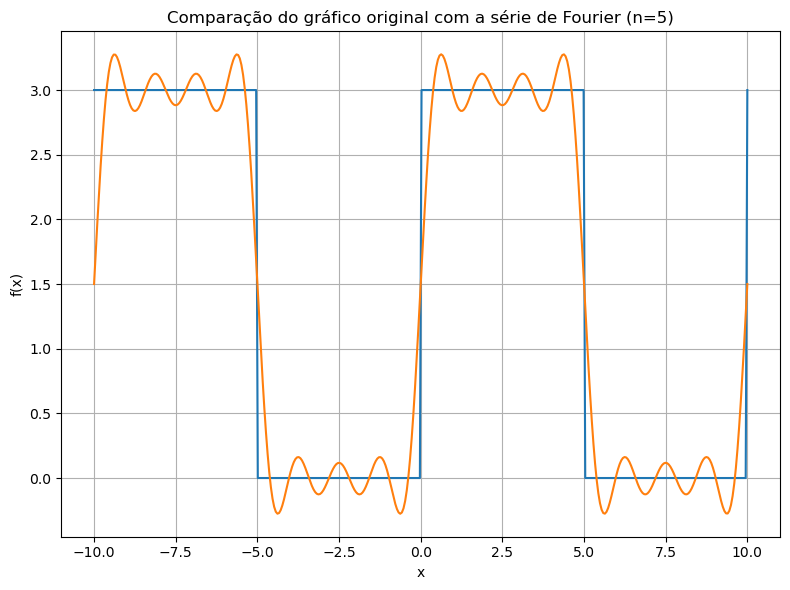

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sympy.plotting import plot


# Função periódica usando NumPy
def f_np(x):
    x = x % T  # Torna x periodicamente repetido com período T
    return np.where((x >= 0) & (x < 5), 3, 0)

# Domínio para o plot
x_np = np.linspace(-10, 10, 400)

# Cálculo da função e da série em NumPy
y_np = f_np(x_np)
y_fourier_np = np.array([s.subs(x, val).evalf() for val in x_np])  # Avaliação numérica da série de Fourier

# Plotando a função original e as aproximações da série de Fourier
plt.figure(figsize=(8, 6))

y_fourier_np = np.array([s.subs(x, val).evalf() for val in x_np])  # Avaliação numérica da série de Fourier
    
plt.plot(x_np, y_np)
plt.plot(x_np, y_fourier_np)
plt.title(f"Comparação do gráfico original com a série de Fourier (n={n})")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)

plt.tight_layout()
plt.show()

As condições particulares que uma função $f(x)$ deve cumprir para que possa ser expandida como uma série de Fourier são conhecidas como condições de Dirichlet:

#### <font color='red'> Teorema 1 (Condições de Dirichlet) </font>

<font color='red'>Suponha que<br><br>
 (i) $f(x)$ é definida e uniforme com possível excessão para um número finito de pontos em $(-L,L)$;<br><br>
 (ii) $f(x)$ é periódica, fora de $(-L,L)$ com período $2L$;<br><br>
 (iii) $f(x)$ e $f'(x)$ são seccionalmente contínuas em $(-L,L)$.<br><br>
 Então, a série $(1)$, com coeficientes $(2)$ e $(3)$, converge para<br><br>
 (a) $f(x)$ se $x$ é um ponto onde há continuidade;<br><br>
 (b) $\frac{lim_{\epsilon \to 0^{+}} f(x+\epsilon) + lim_{\epsilon \to 0^{-}} f(x+\epsilon)}{2}$ se $x$ é um ponto onde há descontinuidade.</font>

#### <font color='blue'> Exemplo 4 </font>

<font color='blue'> Considere a função dada no **Exemplo 3**:<br><br>
 $$f(x) = \left\{ \begin{array}{}
 0 &  -5 < x < 0 \\
 3 & \ \ \ 0 < x < 5 \end{array}\right. \ \ \ T = 10$$<br>
 Como se definirá $f(x)$ para $x = -5$, $x = 0$ e $x = 5$, de modo que a série de Fourier venha a convergir para $f(x)$, com $-5 \leq x \leq 5$?

##### <font color='blue'> Solução </font>

<font color='blue'>

<font color='blue'> Note que $f(x)$ satisfaz as condições de Dirichlet. Assim, podemos dizer que a série converge para $f(x)$ em todos os pontos de continuidade e para $\frac{lim_{\epsilon \to 0^{+}} f(x+\epsilon) + lim_{\epsilon \to 0^{-}} f(x+\epsilon)}{2}$ nos pontos de descontinuidade. Para $x = -5, 0 \ \text{e} \ 5$, que são pontos de descontinuidade, a série converge para $\frac{3+0}{2} = \frac{3}{2}$. Podemos apresentar uma nova definição de $f(x)$:<br><br>
 $$f(x) = \left\{ \begin{array}{}
 \frac{3}{2} & \ \ \ x = -5 \\
 0 &  -5 < x < 0 \\
 \frac{3}{2} & \ \ \ x = 0 \\
 3 & \ \ \ 0 < x < 5 \\
 \frac{3}{2} & \ \ \ x = 5 \end{array}\right. \ \ \ T = 10$$

#### <font color='blue'> Exemplo 5 </font>

<font color='blue'> Determine a série de Fourier de $f(x) = x^{2}$, $0 < x < 2\pi$ ($T = 2\pi$):

##### <font color='blue'> Solução </font>

<font color='blue'> Temos que $c = 0$ e $T = 2L = 2\pi \Rightarrow L = \pi$. Assim,<br><br>
 $$a_{n} = \frac{1}{L} \int_{c}^{c+2L} f(x) cos\left(\frac{n\pi x}{L}\right) dx = \frac{1}{\pi}  \int_{0}^{0+2\pi} x^{2}cos(nx) dx = $$<br>
 $$= \frac{1}{\pi}\int_{0}^{2\pi} x^{2}cos(nx) dx =^{*} \frac{1}{\pi}\left.\left(x^{2}\left(\frac{sen(nx)}{n}\right) - 2x\left(\frac{-cos(nx)}{n^{2}}\right) + 2\left(\frac{-sen(nx)}{n^{3}}\right)\right)\right|_{0}^{2\pi} = \frac{1}{\pi}\frac{4\pi}{n^{2}} = \frac{4}{n^{2}}$$<br>
 Se $n = 0$, temos que<br><br>
 $$a_{0} = \frac{1}{\pi}\int_{0}^{2\pi}x^{2} dx = \frac{1}{\pi}\left.\frac{x^{3}}{3}\right|_{0}^{2\pi} = \frac{1}{\pi}\frac{8\pi^{3}}{3} = \frac{8\pi^{2}}{3}$$<br>
 $$b_{n} = \frac{1}{L} \int_{c}^{c+2L} f(x) sen\left(\frac{n\pi x}{L}\right) dx = \frac{1}{\pi}  \int_{0}^{0+2\pi} x^{2}sen(nx) dx = $$<br>
 $$= \frac{1}{\pi}\int_{0}^{2\pi} x^{2}sen(nx) dx = \frac{1}{\pi}\left.\left(x^{2}\left(\frac{-cos(nx)}{n}\right) - 2x\left(\frac{-sen(nx)}{n^{2}}\right) + 2\left(\frac{cos(nx)}{n^{3}}\right)\right)\right|_{0}^{2\pi} = -\frac{4\pi}{n}^{**}$$<br>
 Assim,<br><br>
 $$f(x) = x^{2}_{([0,2\pi],2\pi)} = \frac{4\pi^{2}}{3} + \sum_{n=1}^{\infty}\left(\frac{4}{n^{2}}cos(nx) - \frac{4\pi}{n}sen(nx) \right)$$<br>
 Caso $x = 0$ ou $x = 2\pi$ a série converge para<br><br>
 $$\frac{0^{2} + (2\pi)^{2}}{2} = \frac{4\pi^{2}}{2} = 2\pi^{2}.$$<br>
 $^{*}$ Vejamos o cálculo da integral $\int x^{2}cos(nx)dx$ que se resolve por partes:<br>
 $$\int x^{2}cos(nx) dx = \underset{u_{1}=x^{2}, \ v_{1} = cos(nx)}{\underbrace{u_{1}v_{1} - \int v_{1}du_{1}}} =  \frac{x^{2}sen(nx)}{n} - \int \frac{2xsen(nx)}{n} dx =$$<br>
 $$\frac{x^{2}sen(nx)}{n} - \underset{u_{2}=2x, \ v_{2} = \frac{sen(nx)}{n}}{\underbrace{u_{2}v_{2} - \int_{0}^{2\pi}v_{2}du_{2}}} dx = \frac{x^{2}sen(nx)}{n} - \left(2x\frac{-cos(nx)}{n^{2}} - \int\frac{2(-cos(nx))}{n} dx \right) = $$<br>
 $$= \frac{x^{2}sen(nx)}{n} + \frac{2xcos(nx)}{n^{2}} - \frac{2sen(nx)}{n^{3}} \Rightarrow \left. \frac{x^{2}sen(nx)}{n} + \frac{2xcos(nx)}{n^{2}} - \frac{2sen(nx)}{n^{3}}\right|_{0}^{2\pi} = $$<br>
 $$= \left(\frac{(2\pi)^{2}sen(n\cdot2\pi)}{n} + \frac{2\cdot2\pi cos(n\cdot2\pi)}{n^{2}} - \frac{2sen(n\cdot2\pi)}{n^{3}}\right) - \left(\frac{0^{2}sen(n\cdot0)}{n} + \frac{2\cdot0cos(n\cdot0)}{n^{2}} - \frac{2sen(n\cdot0)}{n^{3}}\right) =$$<br>
 $$ = \left(0 + \frac{4\pi}{n^{2}}- 0\right) - (0 + 0 - 0) = \frac{4\pi}{n^{2}}.$$<br>
 O cálculo de $^{**} \int_{0}^{2\pi} x^{2} sen(nx) dx$ segue a mesma ideia usada anteriormente.<br><br>
 Vejamos o cálculo da série de Fourier no Python:

In [5]:
from sympy import fourier_series, pi, symbols

# Definição dos símbolos
x = symbols('x')

# Definindo a função x^2 para cálculo simbólico da série de Fourier
f = x**2

# Parâmetros da série de Fourier
T = 2 * pi
n = 10

# Calculando a série de Fourier truncada para n termos
s = fourier_series(f, (x, 0, 2 * pi)).truncate(n)
s

-4*pi*sin(x) - 2*pi*sin(2*x) - 4*pi*sin(3*x)/3 - pi*sin(4*x) - 4*pi*sin(5*x)/5 - 2*pi*sin(6*x)/3 - 4*pi*sin(7*x)/7 - pi*sin(8*x)/2 - 4*pi*sin(9*x)/9 + 4*cos(x) + cos(2*x) + 4*cos(3*x)/9 + cos(4*x)/4 + 4*cos(5*x)/25 + cos(6*x)/9 + 4*cos(7*x)/49 + cos(8*x)/16 + 4*cos(9*x)/81 + 4*pi**2/3

<font color='blue'> Agora vejamos o gráfico:

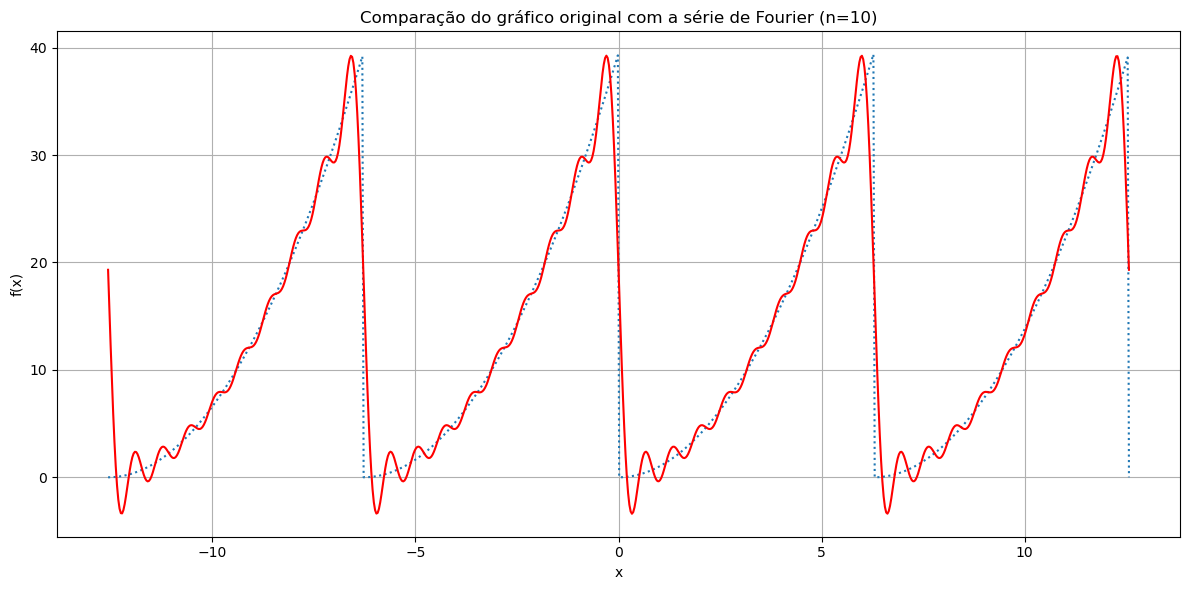

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Função periódica usando NumPy
def f_np(x):
    x = x % (2 * np.pi)  # Torna x periodicamente repetido com período 2pi
    return x**2

# Domínio para o plot
x_np = np.linspace(-4 * np.pi, 4 * np.pi, 800)

# Cálculo da função original em NumPy
y_np = f_np(x_np)

# Plotando a função original e as aproximações da série de Fourier
plt.figure(figsize=(12, 6))
y_fourier_np = np.array([s.subs(x, val).evalf() for val in x_np])  # Avaliação numérica da série de Fourier
plt.plot(x_np, y_np, linestyle='dotted')
plt.plot(x_np, y_fourier_np, color='red')
plt.title(f"Comparação do gráfico original com a série de Fourier (n={n})")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)

plt.tight_layout()
plt.show()


# <div style="margin-top: -20px;">
<hr style="border: 2px solid black;">

<font color='black'><span style="font-size: 22px;"><strong>3.3 Casos Especiais</strong></span></font>

<hr style="border: 2px solid black;">
</div>

#### Funções Pares e Funções Ímpares

<font color='red'>i) Uma função $f(x)$ é dita par se $f(-x) = f(x)$ para todo $x$ pertencente ao domínio de $f$.<br><br>
 ii) Uma função $f(x)$ é ímpar se $f(-x) = -f(x)$ para todo $x$ pertencente ao domínio de $f$.</font>

Note que:

$$cos(-x) = cos(x) \ \ \text{e} \ \ sen(-x) = -sen(x)$$

Isto é, $cos(x)$ é uma função par e $sen(x)$ é uma função ímpar.

#### <font color='blue'> Exemplo 6 </font>

<font color='blue'> Classifique cada uma das funções reais a seguir em par, ímpar ou nenhum dos casos:<br><br>
 a) $f(x) = x^{3}$<br><br>
 b) $g(x) = 2x^{4} + x^{2} -2$<br><br>
 c) $h(x) = x^{3} + 1$<br><br>
 d) $s(x) = tg(2x)$

##### <font color='blue'> Solução </font>

<font color='blue'> a) Temos que<br><br>
 $$f(-x) = (-x)^{3} = -x^{3} = -f(x)$$<br>
 Portanto, $f(x) = x^{3}$ é uma função ímpar.<br><br>
 b) Temos que<br><br>
 $$g(-x) = 2(-x)^{4} + (-x)^{2} - 2 = 2x^{4} + x^{2} - 2 = g(x)$$<br>
 Portanto, $g(x) = 2x^{4} + x^{2} - 2$ é uma função par.<br><br>
 c) Temos que<br><br>
 $$h(-x) = (-x)^{3} + 1 = -x^{3} + 1 \neq h(x) \ \text{e} \ h(-x)$$<br>
 Portanto, $h(x)$ não é nem par nem ímpar.<br><br>
 Uma outra forma de ver isto é testar dois valores simétricos e ver que os resultados nem se mantém os mesmos (função par) nem se alternam os sinais (função ímpar). Por exemplo, $h(2) = 2^{3} + 1 = 9$ e $h(-2) = (-2)^{3} + 1 = -7$.<br><br>
 d) Temos que<br><br>
 $$s(-x) = tg(2(-x)) = \frac{sen(-2x)}{cos(-2x)} = \frac{-sen(2x)}{cos(2x)} = -\frac{sen(2x)}{cos(2x)} = -tg(2x)$$<br><br>
 Portanto, $s(x) = tg(2x)$ é uma função ímpar.

#### <font color='red'> Teorema 1 </font>

<font color='red'> i) O produto de funções de mesma paridade (ambas pares ou ambas ímpares) resulta em uma função par.<br><br>
 ii) O produto de duas funções de paridades diferentes (uma par e outra ímpar) resulta em uma função ímpar.

##### <font color='red'> Demonstração </font>

<font color='red'> i) Sejam $f(x)$ e $g(x)$ duas funções pares. Temos que $h(x) = f(x)g(x)$ é tal que<br><br>
 $$h(-x) = f(-x)g(-x) = f(x)g(x) = h(x).$$<br>
 Portanto, $h(x)$ é uma função par.<br><br>
 Caso $f(x)$ e $g(x)$ sejam ambas funções ímpares, temos que:<br><br>
 $$h(-x) = f(-x)g(-x) = (-f(x))(-g(x)) = f(x)g(x) = h(x).$$<br>
 Da mesma forma, $h(x)$ é uma função par.<br><br>
 ii) Sejam $f(x)$ e $g(x)$ funções de paridades distintas, digamos $f(x)$ ímpar e $g(x)$ par. Neste caso,<br><br>
 $$h(-x) = f(-x)g(-x) = (-f(x))g(x) = -f(x)g(x) = -h(x).$$
 Portanto, $h(x)$ é uma função ímpar.

#### <font color='red'> Teorema 2 </font>

<font color='red'> i) Uma função par não pode apresentar termos de seno, no seu desenvolvimento de Fourier.<br><br>
 ii) Uma função ímpar não pode apresentar termos de cosseno, no seu desenvolvimento de Fourier.

##### <font color='red'> Demonstração </font>

<font color='red'> i) Suponhamos que<br><br>
 $$f(x) = \frac{a_{0}}{2} + \sum_{n=1}^{\infty} \left(a_{n}cos\left(\frac{n\pi x}{L}\right) + b_{n}sen\left(\frac{n\pi x}{L}\right) \right)$$<br>
 Assim,<br><br>
 $$f(-x) = \frac{a_{0}}{2} + \sum_{n=1}^{\infty} \left(a_{n}cos\left(\frac{n\pi (-x)}{L}\right) + b_{n}sen\left(\frac{n\pi (-x)}{L}\right) \right) = \frac{a_{0}}{2} + \sum_{n=1}^{\infty} \left(a_{n}cos\left(\frac{n\pi x}{L}\right) - b_{n}sen\left(\frac{n\pi x}{L}\right) \right)$$<br>
 Se $f(x) = f(-x)$, então<br><br>
 $$\frac{a_{0}}{2} + \sum_{n=1}^{\infty} \left(a_{n}cos\left(\frac{n\pi x}{L}\right) + b_{n}sen\left(\frac{n\pi x}{L}\right) \right) = \frac{a_{0}}{2} + \sum_{n=1}^{\infty} \left(a_{n}cos\left(\frac{n\pi x}{L}\right) - b_{n}sen\left(\frac{n\pi x}{L}\right) \right)$$<br>
 o que implica que $\sum_{n=1}^{\infty} b_{n} sen\left(\frac{n\pi x}{L}\right) = 0$. Portanto,
 $$f(x) = \frac{a_{0}}{2} + \sum_{n=1}^{\infty} a_{n}cos\left(\frac{n\pi x}{L}\right). \tag{5}$$<br>
 Analogamente demonstra-se o item "ii". Além disso, considerando-se uma função ímpar, temos que<br><br>
 $$f(x) = \sum_{n=1}^{\infty} b_{n}sen\left(\frac{n\pi x}{L}\right) \tag{6}$$<br>
 Em particular, neste caso, $a_{0} = 0$.

#### <font color='red'> Teorema 3 </font>

<font color='red'> i) Se $f(x)$ é uma função par então,<br><br>
 $$a_{0} = \frac{2}{L}\int_{0}^{L}f(x)dx, \ a_{n} = \frac{2}{L}\int_{0}^{L}f(x)cos\left(\frac{n\pi x}{L}\right) dx \ \text{e} \ b_{n} = 0 \tag{7}$$<br>
 ii) Se $f(x)$ é uma função ímpar então,<br><br>
 $$a_{0} = 0, \ \ a_{n} = 0 \ \text{e} \ b_{n} = \frac{2}{L}\int_{0}^{L}f(x)sen\left(\frac{n\pi x}{L}\right) dx \tag{8}$$<br>

##### <font color='red'> Demonstração </font>

<font color='red'> i) Sendo $f$ e $cos$ pares e $sen$ ímpar, temos:<br><br>
 $$a_{n} = \frac{1}{L}\int_{-L}^{L}f(x)cos\left(\frac{n\pi x}{L}\right) dx =  \frac{1}{L}\int_{-L}^{0}f(x)cos\left(\frac{n\pi x}{L}\right) dx + \frac{1}{L}\int_{0}^{L}f(x)cos\left(\frac{n\pi x}{L}\right) dx$$<br>
 Fazendo $x = -u$, temos que:<br><br>
 $$1) \ dx = -du, \ 2) \ x = 0 \Rightarrow u = 0, \ 3) \ x = -L \Rightarrow u = L^{*}$$<br>
 $$a_{n}= \frac{1}{L}\int_{L}^{0}f(-u)cos\left(\frac{n\pi(-u)}{L}\right)(-du) + \frac{1}{L}\int_{0}^{L}f(x)cos\left(\frac{n\pi x}{L}\right) dx = $$<br>
 $$ = -\frac{1}{L}\int_{L}^{0}f(u)cos\left(\frac{n\pi u}{L}\right)du + \frac{1}{L}\int_{0}^{L}f(x)cos\left(\frac{n\pi x}{L}\right) dx =^{**}$$<br>
 $$ = \frac{1}{L}\int_{0}^{L}f(u)cos\left(\frac{n\pi u}{L}\right)du + \frac{1}{L}\int_{0}^{L}f(x)cos\left(\frac{n\pi x}{L}\right) dx = \frac{2}{L}\int_{0}^{L}f(x)cos\left(\frac{n\pi x}{L}\right) dx$$<br>
 Da mesma forma,<br><br>
 $$a_{0} = \frac{1}{L}\int_{-L}^{L}f(x)dx = \frac{1}{L}\int_{-L}^{0}f(x)dx + \frac{1}{L}\int_{0}^{L}f(x) dx = $$<br>
 $$ = \frac{1}{L}\int_{L}^{0}f(-u)(-du) + \frac{1}{L}\int_{0}^{L}f(x) dx = -\frac{1}{L}\int_{L}^{0}f(u)du + \frac{1}{L}\int_{0}^{L}f(x) dx =$$<br>
 $$ = \frac{1}{L}\int_{0}^{L}f(u)du + \frac{1}{L}\int_{0}^{L}f(x) dx = \frac{2}{L}\int_{0}^{L}f(x) dx$$<br>
 De maneira análoga,<br><br>
 $$b_{n} = \frac{1}{L}\int_{-L}^{L}f(x)sen\left(\frac{n\pi x}{L}\right) dx =  \frac{1}{L}\int_{-L}^{0}f(x)sen\left(\frac{n\pi x}{L}\right) dx + \frac{1}{L}\int_{0}^{L}f(x)sen\left(\frac{n\pi x}{L}\right) dx = $$<br>
 $$ = \frac{1}{L}\int_{L}^{0}f(-u)sen\left(\frac{n\pi(-u)}{L}\right)(-du) + \frac{1}{L}\int_{0}^{L}f(x)sen\left(\frac{n\pi x}{L}\right) dx = $$<br>
 $$ = \frac{1}{L}\int_{L}^{0}f(u)\left(-sen\left(\frac{n\pi u}{L}\right)\right)(-du) + \frac{1}{L}\int_{0}^{L}f(x)sen\left(\frac{n\pi x}{L}\right) dx =$$<br>
 $$ = \frac{1}{L}\int_{L}^{0}f(u)sen\left(\frac{n\pi u}{L}\right)du + \frac{1}{L}\int_{0}^{L}f(x)sen\left(\frac{n\pi x}{L}\right) dx =^{**}$$<br>
 $$ = -\frac{1}{L}\int_{0}^{L}f(u)sen\left(\frac{n\pi u}{L}\right) du + \frac{1}{L}\int_{0}^{L}f(x)sen\left(\frac{n\pi x}{L}\right) dx = 0$$<br>
 $^{*}$ Usamos neste caso o fato de $x = -u$ termos $\int_{x=a}^{x=b}g(x)dx = \int_{u=-a}^{u=-b}g(-u)(-du)$<br><br>
 $^{**}$ Usamos neste ponto o fato de $\int_{a}^{b}g(x)dx = -\int_{b}^{a}g(x)dx.$<br><br>
 ii) Sendo $f$ e $sen$ ímpares e $cos$ par, temos:<br><br>
 $$a_{0} = \frac{1}{L}\int_{-L}^{L} f(x) dx = \frac{1}{L}\int_{-L}^{0} f(x)dx + \frac{1}{L}\int_{0}^{L}f(x) dx$$<br>
 Fazendo $x = -u$, temos:
 $$a_{0} = \frac{1}{L}\int_{-L}^{L} f(x) dx = \frac{1}{L}\int_{L}^{0} f(-u)(-du) + \frac{1}{L}\int_{0}^{L}f(x) dx =$$<br>
 $$ = \frac{1}{L}\int_{L}^{0} f(u)du + \frac{1}{L}\int_{0}^{L}f(x) dx =^{**} -\frac{1}{L}\int_{0}^{L} f(u)du + \frac{1}{L}\int_{0}^{L}f(x) dx = 0$$<br>
 Considerando $a_{n}$, temos:<br><br>
 $$a_{n} = \frac{1}{L}\int_{-L}^{L}f(x)cos\left(\frac{n\pi x}{L}\right) dx =  \frac{1}{L}\int_{-L}^{0}f(x)cos\left(\frac{n\pi x}{L}\right) dx + \frac{1}{L}\int_{0}^{L}f(x)cos\left(\frac{n\pi x}{L}\right) dx = $$<br>
 $$= \frac{1}{L}\int_{L}^{0}f(-u)cos\left(\frac{n\pi(-u)}{L}\right)(-du) + \frac{1}{L}\int_{0}^{L}f(x)cos\left(\frac{n\pi x}{L}\right) dx = $$<br>
 $$ = \frac{1}{L}\int_{L}^{0}f(u)cos\left(\frac{n\pi u}{L}\right)du + \frac{1}{L}\int_{0}^{L}f(x)cos\left(\frac{n\pi x}{L}\right) dx =^{**}$$<br>
 $$ = -\frac{1}{L}\int_{0}^{L}f(u)cos\left(\frac{n\pi u}{L}\right)du + \frac{1}{L}\int_{0}^{L}f(x)cos\left(\frac{n\pi x}{L}\right) dx = 0$$<br>
 Por outro lado,<br><br>
 $$b_{n} = \frac{1}{L}\int_{-L}^{L}f(x)sen\left(\frac{n\pi x}{L}\right) dx =  \frac{1}{L}\int_{-L}^{0}f(x)sen\left(\frac{n\pi x}{L}\right) dx + \frac{1}{L}\int_{0}^{L}f(x)sen\left(\frac{n\pi x}{L}\right) dx$$<br>
 De maneira análoga,<br><br>
 $$b_{n}= \frac{1}{L}\int_{L}^{0}f(-u)sen\left(\frac{n\pi(-u)}{L}\right)(-du) + \frac{1}{L}\int_{0}^{L}f(x)sen\left(\frac{n\pi x}{L}\right) dx = $$<br>
 $$ = \frac{1}{L}\int_{L}^{0}(-f(u))\left(-sen\left(\frac{n\pi u}{L}\right)\right)(-du) + \frac{1}{L}\int_{0}^{L}f(x)sen\left(\frac{n\pi x}{L}\right) dx =$$<br>
 $$ = -\frac{1}{L}\int_{L}^{0}f(u)sen\left(\frac{n\pi u}{L}\right)du + \frac{1}{L}\int_{0}^{L}f(x)sen\left(\frac{n\pi x}{L}\right) dx =^{**}$$<br>
 $$ = \frac{1}{L}\int_{0}^{L}f(u)sen\left(\frac{n\pi u}{L}\right) du + \frac{1}{L}\int_{0}^{L}f(x)sen\left(\frac{n\pi x}{L}\right) dx = \frac{2}{L}\int_{0}^{L}f(x)sen\left(\frac{n\pi x}{L}\right) dx$$

##### Exemplificando com uma função par:

O código a seguir apresenta os $5$ primeiros coeficientes da série de Fourier da função par $f(x) = x^{2}$, $-\pi \leq x \leq \pi$ com $T = 2\pi$.

In [7]:
from sympy import fourier_series, pi, symbols
# Definição dos símbolos
x = symbols('x')

# Definindo a função x para cálculo simbólico da série de Fourier
f = x**2

# Parâmetros da série de Fourier
T = 2 * pi
n = 5

# Calculando a série de Fourier truncada para n termos
s = fourier_series(f, (x, -pi, pi)).truncate(n)
s

-4*cos(x) + cos(2*x) - 4*cos(3*x)/9 + cos(4*x)/4 + pi**2/3

Vejamos o gráfico:

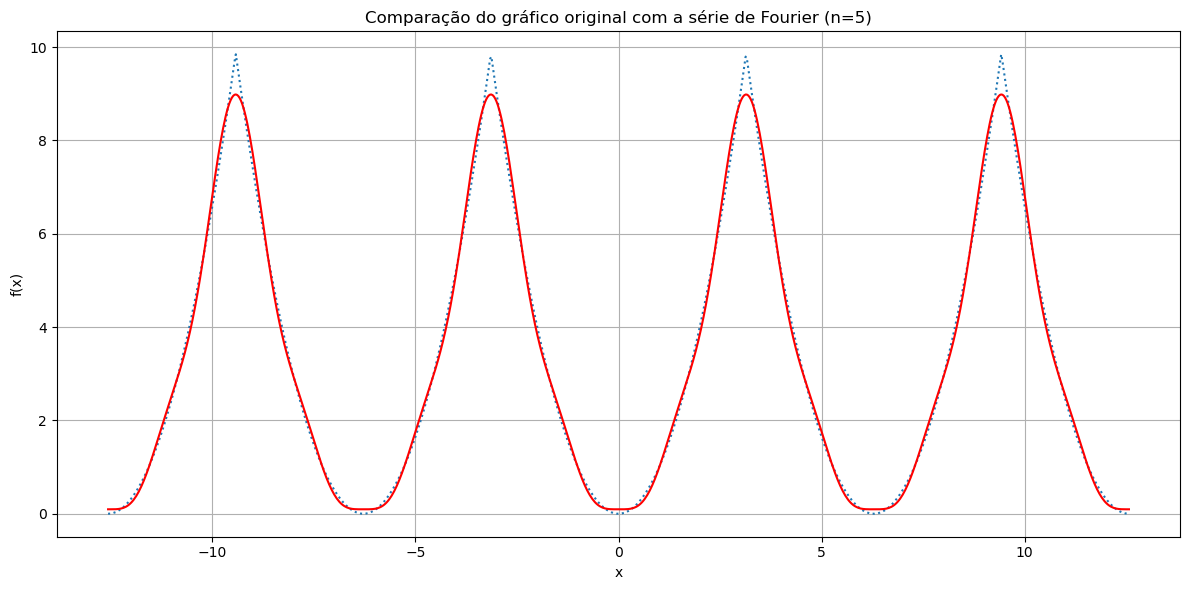

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Função periódica usando NumPy
def f_np(x):
    # Ajusta x para estar no intervalo [-pi, pi]
    x = (x + np.pi) % (2 * np.pi) - np.pi
    return x**2

# Domínio para o plot
x_np = np.linspace(-4 * np.pi, 4 * np.pi, 800)

# Cálculo da função original em NumPy
y_np = f_np(x_np)

# Plotando a função original e as aproximações da série de Fourier
plt.figure(figsize=(12, 6))

y_fourier_np = np.array([s.subs(x, val).evalf() for val in x_np])  # Avaliação numérica da série de Fourier

plt.plot(x_np, y_np, linestyle='dotted')
plt.plot(x_np, y_fourier_np, color='red')
plt.title(f"Comparação do gráfico original com a série de Fourier (n={n})")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)

plt.tight_layout()
plt.show()

##### Exemplificando com uma função ímpar:

O código a seguir apresenta os $5$ primeiros coeficientes da série de Fourier da função par $f(x) = x$, $-\pi \leq x \leq \pi$ com $T = 2\pi$.

In [9]:
from sympy import fourier_series, pi, symbols
# Definição dos símbolos
x = symbols('x')

# Definindo a função x para cálculo simbólico da série de Fourier
f = x

# Parâmetros da série de Fourier
T = 2 * pi
n = 5

# Calculando a série de Fourier truncada para n termos
s = fourier_series(f, (x, -pi, pi)).truncate(n)
s

2*sin(x) - sin(2*x) + 2*sin(3*x)/3 - sin(4*x)/2 + 2*sin(5*x)/5

Vejamos o gráfico:

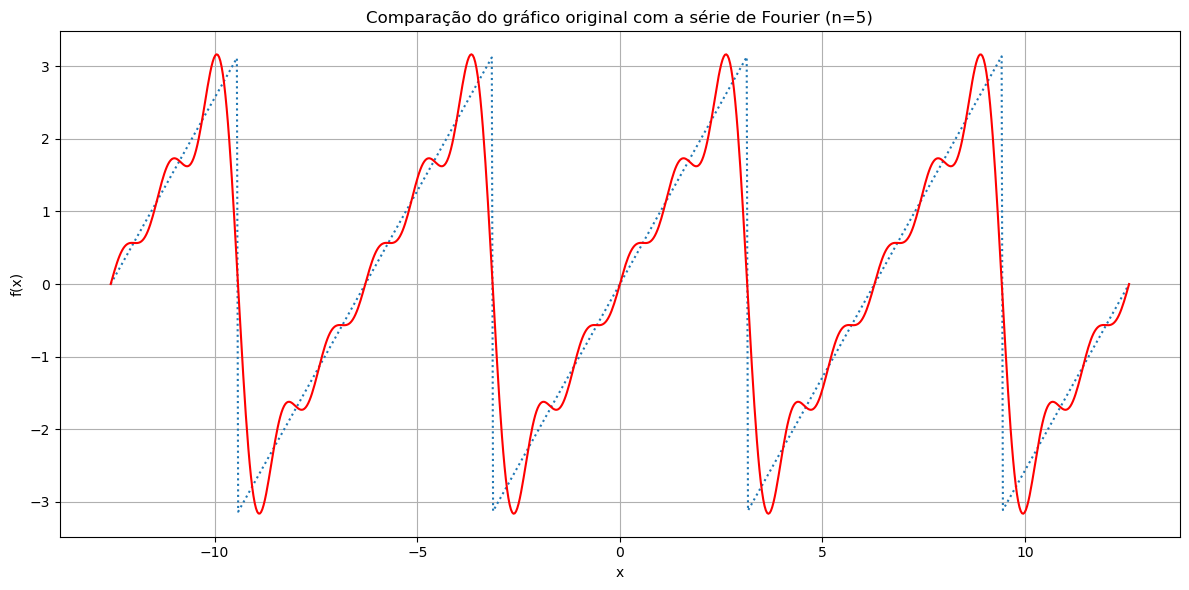

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Função periódica usando NumPy
def f_np(x):
    # Ajusta x para estar no intervalo [-pi, pi]
    x = (x + np.pi) % (2 * np.pi) - np.pi
    return x

# Domínio para o plot
x_np = np.linspace(-4 * np.pi, 4 * np.pi, 800)

# Cálculo da função original em NumPy
y_np = f_np(x_np)

# Plotando a função original e as aproximações da série de Fourier
plt.figure(figsize=(12, 6))

y_fourier_np = np.array([s.subs(x, val).evalf() for val in x_np])  # Avaliação numérica da série de Fourier
    
plt.plot(x_np, y_np, linestyle='dotted')
plt.plot(x_np, y_fourier_np, color='red')
plt.title(f"Comparação do gráfico original com a série de Fourier (n={n})")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)

plt.tight_layout()
plt.show()

#### Séries de Fourier de Senos ou de Cossenos

Uma série de Fourier de senos ou de cossenos é uma série na qual aparecem apenas termos de senos ou de cossenos. Para se ter uma série deste tipo, correspondendo a uma função dada, esta é, geralmente definida no intervalo $(0,L)$ (metade do intervalo $(-L,L)$) e classifica-se a função como ímpar ou par, de modo que a função seja claramente definida na outra metade do intervalo, isto é, em $(-L,0)$. Neste caso, temos

<font color='red'>$$\left\{ \begin{array}{}
 a_{n} = 0, \ \ b_{n}  =  \frac{2}{L} \int_{0}^{L} f(x)sen\left(\frac{n\pi x}{L}\right) dx, & \text{série de senos}\\
 b_{n} = 0, \ \ a_{n}  =  \frac{2}{L} \int_{0}^{L} f(x)cos\left(\frac{n\pi x}{L}\right) dx, & \text{série de cossenos}\end{array}\right. \ \ \ n = 0,1,2,... \tag{9} $$</font>

A extensão par de uma função, $f(x), \ 0 < x < L$ é a função $f(x)$ tal que $f(-x) = f(x), \ -L < x < 0$. Por outro lado, a extensão ímpar de uma função $f(x), \ 0 < x < L$ é a função $f(x)$ tal que $f(-x) = - f(x), \ -L < x < 0$.

#### <font color='blue'> Exemplo 7 </font>

<font color='blue'> Desenvolver $f(x) = x, \ 0 < x < 2$, em uma série de Fourier de senos considerando sua extensão ímpar.

##### <font color='blue'> Solução </font>

<font color='blue'> A extemsão ímpar de $f(x)$ é dada por $g(x) = x, \ -2 < x < 2$ cujo período é $4$. Assim, $2L = 4 \Rightarrow L = 2$.Temos que $a_{n} = 0$ e<br><br>
 $$b_{n} = \frac{2}{L}\int_{0}^{L} f(x) sen\left(\frac{n\pi x}{L}\right) dx = \frac{2}{2}\int_{0}^{2} xsen\left(\frac{n\pi x}{2}\right) = \left.\left(-\frac{2x}{n\pi}cos\left(\frac{n\pi x}{2}\right) + \frac{4}{n^{2}\pi^{2}}sen\left(\frac{n\pi x}{2}\right) \right)\right|_{0}^{2} =  $$<br>
 $$= \left(-\frac{2\cdot2}{n\pi}cos\left(\frac{n\pi\cdot 2}{2}\right) + \frac{4}{n^{2}\pi^{2}}sen\left(\frac{n\pi\cdot2}{2}\right)\right) - \left(-\frac{2\cdot0}{n\pi}cos\left(\frac{n\pi\cdot 0}{2}\right) + \frac{4}{n^{2}\pi^{2}}sen\left(\frac{n\pi\cdot0}{2}\right)\right) =$$<br>
 $$ = \left(-\frac{4}{n\pi}cos(n\pi) + 0\right) - (-0 + 0) = -\frac{4}{n\pi}cos(n\pi)$$<br>
 Portanto,<br><br>
 $$g(x) = \sum_{n=1}^{\infty} -\frac{4}{n\pi}cos(n\pi)sen\left(\frac{n\pi x}{2}\right) =$$<br>
 $$= \frac{4}{\pi}\left(sen\left(\frac{\pi x}{2}\right) - \frac{1}{2}sen\left(\frac{2\pi x}{2}\right) + \frac{1}{3}sen\left(\frac{3\pi x}{2}\right) - \ldots\right)$$

In [11]:
from sympy import fourier_series, symbols, integrate, sin, pi

# Definição dos símbolos
x = symbols('x')

# Parâmetros da série de Fourier
L = 2
n = 5

# Definindo a função estendida para ser ímpar
# Função ímpar terá apenas termos de seno na série de Fourier
f_impar = x

# Calculando a série de Fourier truncada para n termos (apenas senos)
s_senos = fourier_series(f_impar, (x, -L, L)).truncate(n)
s_senos

4*sin(pi*x/2)/pi - 2*sin(pi*x)/pi + 4*sin(3*pi*x/2)/(3*pi) - sin(2*pi*x)/pi + 4*sin(5*pi*x/2)/(5*pi)

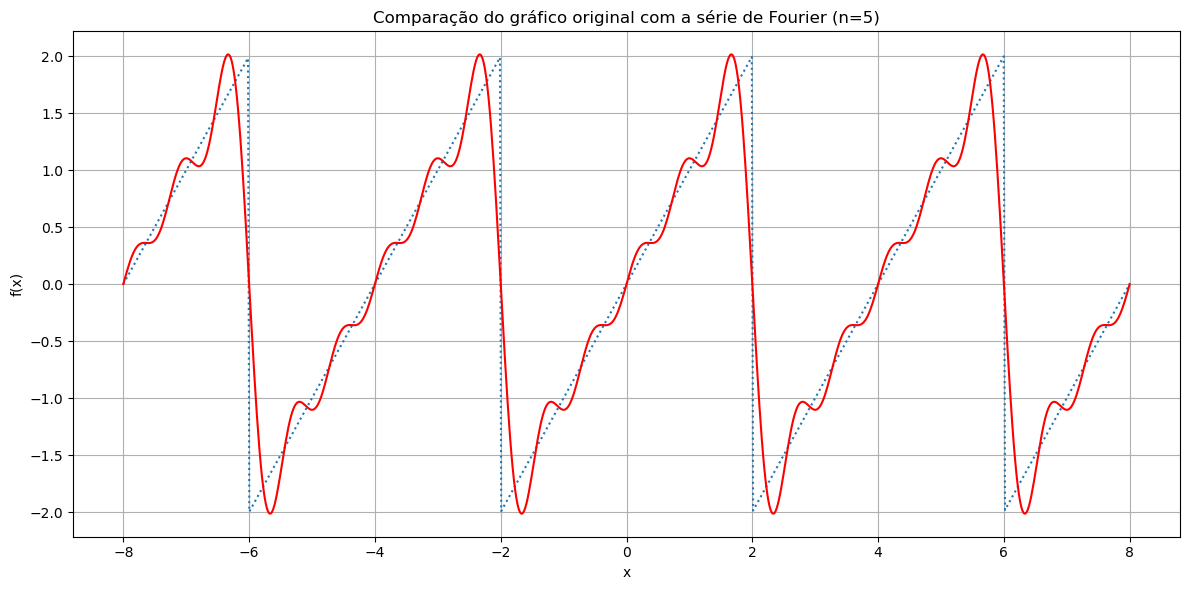

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Função periódica usando NumPy
def f_np(x):
    x = (x + L) % (2 * L) - L  # Ajusta x para estar no intervalo [-L, L]
    return x

# Domínio para o plot
x_np = np.linspace(-4 * L, 4 * L, 800)

# Cálculo da função original em NumPy
y_np = f_np(x_np)

# Plotando a função original e as aproximações da série de Fourier
plt.figure(figsize=(12, 6))

y_fourier_np = np.array([s_senos.subs(x, val).evalf() for val in x_np])  # Avaliação numérica da série de Fourier
    
plt.plot(x_np, y_np, linestyle='dotted')
plt.plot(x_np, y_fourier_np, color='red')
plt.title(f"Comparação do gráfico original com a série de Fourier (n={n})")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)

plt.tight_layout()
plt.show()

#### <font color='blue'> Exemplo 8 </font>

<font color='blue'> Desenvolver $f(x) = x, \ 0 < x < 2$, em uma série de Fourier de cossenos considerando sua extensão par.<br><br>

##### <font color='blue'> Solução </font>

<font color='blue'> A extemsão par de $f(x)$ é dada por $g(x) = |x|, \ -2 < x < 2$ cujo período é $4$. Assim, $2L = 4 \Rightarrow L = 2$. Temos que $b_{n} = 0$ e<br><br>
 $$a_{0} = \frac{2}{L}\int_{0}^{L} f(x) dx = \frac{2}{2}\int_{0}^{2} x dx = \frac{x^{2}}{2}|_{0}^{2} = 2$$<br>
 $$a_{n} = \frac{2}{L}\int_{0}^{L} f(x) cos\left(\frac{n\pi x}{L}\right) dx = \frac{2}{2}\int_{0}^{2} xcos\left(\frac{n\pi x}{2}\right) = \left.\left(\frac{2x}{n\pi}sen\left(\frac{n\pi x}{2}\right) + \frac{4}{n^{2}\pi^{2}}cos\left(\frac{n\pi x}{2}\right) \right)\right|_{0}^{2} =  $$<br>
 $$= \left(\frac{2\cdot2}{n\pi}sen\left(\frac{n\pi\cdot 2}{2}\right) + \frac{4}{n^{2}\pi^{2}}cos\left(\frac{n\pi\cdot2}{2}\right)\right) - \left(\frac{2\cdot0}{n\pi}sen\left(\frac{n\pi\cdot 0}{2}\right) + \frac{4}{n^{2}\pi^{2}}cos\left(\frac{n\pi\cdot0}{2}\right)\right) =$$<br>
 $$\left(0 + \frac{4}{n^{2}\pi^{2}}cos(n\pi)\right) - \left(0 + \frac{4}{n^{2}\pi^{2}}\right) = -\frac{4}{n\pi}cos(n\pi) = \frac{4}{n^{2}\pi^{2}}(cos(n\pi)-1), \ n \neq 0$$<br>
 Portanto,<br><br>
 $$g(x) = 1 + \sum_{n=1}^{\infty} \frac{4}{n^{2}\pi^{2}}(cos(n\pi)-1)cos\left(\frac{n\pi x}{2}\right) =$$<br><br>
 $$= 1 - \frac{8}{\pi^{2}}\left(cos\left(\frac{\pi x}{2}\right) + \frac{1}{3^{2}}cos\left(\frac{3\pi x}{2}\right) + \frac{1}{5^{2}}cos\left(\frac{5\pi x}{2}\right) + \ldots\right)$$

In [13]:
from sympy import fourier_series, symbols, integrate, cos, pi

# Definição dos símbolos
x = symbols('x')

# Parâmetros da série de Fourier
L = 2
n = 5

# Definindo a função estendida para ser par
# Função par terá apenas termos de cosseno na série de Fourier
f_par = abs(x)

# Calculando a série de Fourier truncada para n termos (apenas cossenos)
s_cossenos = fourier_series(f_par, (x, -L, L)).truncate(n)
s_cossenos


-8*cos(pi*x/2)/pi**2 - 8*cos(3*pi*x/2)/(9*pi**2) - 8*cos(5*pi*x/2)/(25*pi**2) - 8*cos(7*pi*x/2)/(49*pi**2) + 1

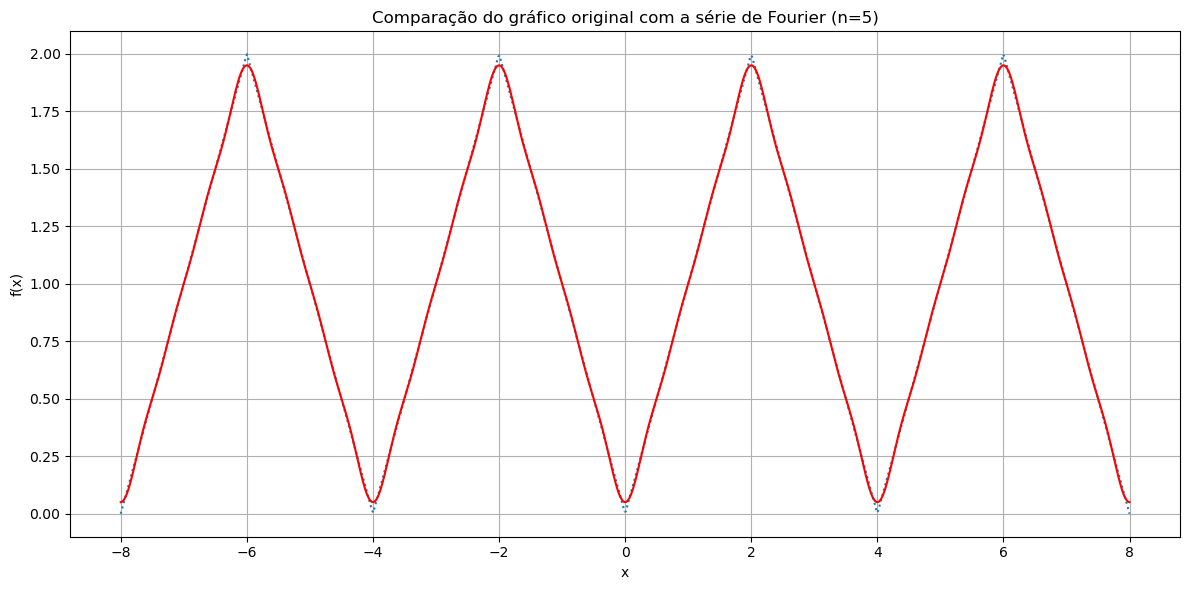

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Função periódica usando NumPy
def f_np(x):
    x = (x + L) % (2 * L) - L  # Ajusta x para estar no intervalo [-L, L]
    return abs(x)

# Domínio para o plot
x_np = np.linspace(-4 * L, 4 * L, 800)

# Cálculo da função original em NumPy
y_np = f_np(x_np)

# Plotando a função original e as aproximações da série de Fourier
plt.figure(figsize=(12, 6))

y_fourier_np = np.array([s_cossenos.subs(x, val).evalf() for val in x_np])  # Avaliação numérica da série de Fourier
    
plt.plot(x_np, y_np, linestyle='dotted')
plt.plot(x_np, y_fourier_np, color='red')
plt.title(f"Comparação do gráfico original com a série de Fourier (n={n})")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)

plt.tight_layout()
plt.show()

#### Funções Simétricas

<font color='red'>Uma função $f(x)$ é considerada simétrica em relação a um eixo $x = s$ quando satisfaz a condição $f(s-x) = f(s+x)$.

#### <font color='blue'> Exemplo 9 </font>

<font color='blue'> Mostre que a função $f(x) = x(\pi-x)$, $0 \leq x \leq \pi$, é simétrica em relação a $\frac{\pi}{2}$.

##### <font color='blue'> Solução </font>

<font color='blue'> Note que<br><br>
$$f\left(\frac{\pi}{2}-x\right) = \left(\frac{\pi}{2} - x\right)\left(\pi - \left(\frac{\pi}{2}-x\right) \right) = \left(\frac{\pi}{2} - x\right)\left(\frac{\pi}{2} + x\right)$$<br>
 $$f\left(\frac{\pi}{2}+x\right) = \left(\frac{\pi}{2} + x\right)\left(\pi - \left(\frac{\pi}{2}+x\right) \right) = \left(\frac{\pi}{2} + x\right)\left(\frac{\pi}{2} - x\right) = f\left(\frac{\pi}{2}-x\right)$$<br>
 Portanto, $f(x)$ é simétrica em relação a $\frac{\pi}{2}$.

##### Consequências da Simetria

O fato de termos uma função simétrica implica que esta reflete-se sobre o eixo vertical passando por $s$, de modo que os valores da função em pontos equidistantes de $s$ em direções opostas são iguais.

Particularmente, uma função par definida no intervalo $0<x<L$ e que possui seu eixo de simetria dentro de seu domínio, especificamente em $x =\frac{L}{2}$, apresenta um caso especial de simetria. Em tais funções, a simetria central torna-se evidente quando observamos que a função assume valores idênticos em $\frac{L}{2}-x$ e $\frac{L}{2} + x$ para qualquer $x$ dentro do intervalo permitido.

*Necessitamos considerar uma mudança específica nos índices dos termos da série de Fourier, tomando $n = 2k$ onde $k$ é um inteiro. Esta escolha não é arbitrária, mas uma consequência direta da posição do eixo de simetria em $\frac{L}{2}$. Os termos de cosseno $cos\left(\frac{n\pi x}{L} \right)$ serão repassados para $cos\left(\frac{2k\pi x}{L} \right)$.*

#### <font color='blue'> Exemplo 10 </font>

<font color='blue'> Use a mudança de variável $n = 2k$ para determinar a expansão em séride de Fourier da função $f(x) = x(\pi-x)$, $0 \leq x \leq \pi$.

##### <font color='blue'> Solução </font>

<font color='blue'> Note que $f(x)$ é uma função par e portanto sua expansão é séries de Fourier conterá somente termos em cosseno. Neste caso, $L = \pi$ e $b_{n} = 0$.<br><br>
 $$a_{0} = \frac{2}{L}\int_{0}^{L} f(x) dx = \frac{2}{\pi} \int_{0}^{\pi}x(\pi-x)dx = \frac{2}{\pi} \int_{0}^{\pi}\pi x - x^{2}dx = \frac{2}{\pi}\left.\left(\pi\frac{x^{2}}{2} - \frac{x^{3}}{3} \right)\right|_{0}^{\pi} = $$<br>
 $$= \frac{2}{\pi}\left(\left(\pi\frac{\pi^{2}}{2} - \frac{\pi^{3}}{3} \right) - \left(\pi\frac{0^{2}}{2} - \frac{0^{3}}{3} \right)\right) = \frac{2}{\pi}\left(\frac{\pi^{3}}{6} - 0 \right) = \frac{\pi^{2}}{3}.$$<br>
 Para o cálculo de $a_{n}, \ n \neq 0$, marcaremos com (i) $^{nul}$ todas as partes que resultarão em valor nulo uma vez que $sen(n\pi x) = 0$ se $x = 0$ ou $x = \pi$ como ocorrerá com frequência; (ii) e com $^{[pp]}$ todas as vezes que usarmos integração por partes ($u$ sendo o polinômio de $dv$ a função trigonométrica). Pois bem, utilizando a mudança $n = 2k$, temos<br><br>
 $$a_{2k} = \frac{2}{L} \int_{0}^{L}f(x)cos\left(\frac{2k\pi x}{L} \right)dx = \frac{2}{\pi}\int_{0}^{\pi}x(\pi-x)cos\left(\frac{2k\pi x}{\pi} \right) dx =$$<br>
 $$= \frac{2}{\pi}\int_{0}^{\pi}(x\pi-x^{2})cos\left(\frac{2k\pi x}{\pi} \right) dx ^{[pp]} = \frac{2}{\pi}\left(\underset{nul}{\underbrace{(x\pi-x^{2})\left.\frac{sen(2kx)}{2k}\right|_{0}^{\pi}}} - \int_{0}^{\pi} (\pi - 2x)\frac{sen(2kx)}{2k} dx\right) = $$<br>
 $$= -\frac{1}{\pi}\int_{0}^{\pi} (\pi - 2x)\frac{sen(2kx)}{k} dx = ^{[pp]} -\frac{1}{\pi}\left(-(\pi-2x)\left.\frac{cos(2kx)}{2k^{2}}\right|_{0}^{\pi} - \underset{nul}{\underbrace{\int_{0}^{\pi} \frac{cos(2kx)}{2k^{2}} dx}} \right) =  $$<br>
 $$= \frac{1}{\pi}(\pi-2x)\left.\frac{cos(2kx)}{2k^{2}}\right|_{0}^{\pi} = \frac{1}{\pi}(\pi-2\pi)\frac{cos(2kx)}{2k^{2}} - \frac{1}{\pi}(\pi-2\cdot0)\frac{cos(2k\cdot 0)}{2k^{2}} = $$<br>
 $$= -\frac{1}{2k^{2}} - \frac{1}{2k^{2}} = -\frac{1}{k^{2}} \Rightarrow a_{2k} =   \left(-1,-\frac{1}{2^{2}},-\frac{1}{3^{2}},-\frac{1}{4^{2}}, \ldots \right)$$<br>
 Por fim, temos:<br><br>
 $$f(x) = \frac{a_{0}}{2} + \sum_{k=1}^{\infty} a_{2k}cos\left(\frac{2k\pi x}{L} \right) =$$<br>
 $$= \frac{\pi^{2}/3}{2} - \frac{cos(2 x)}{1^{2}} - \frac{cos(4 x)}{2^{2}} - \frac{cos(6 x)}{3^{2}} - \ldots = $$<br>
 $$= \frac{\pi^{2}}{6} - \left(\frac{cos(2 x)}{1^{2}} + \frac{cos(4 x)}{2^{2}} + \frac{cos(6 x)}{3^{2}} + \ldots\right)$$<br>

In [15]:
from sympy import fourier_series, symbols, integrate, cos, pi

# Definição dos símbolos
x = symbols('x')

# Parâmetros da série de Fourier
L = pi
n = 5

# Definindo a função estendida para ser par
# Função par terá apenas termos de cosseno na série de Fourier
f = x*(pi-x)

# Calculando a série de Fourier truncada para n termos (apenas cossenos)
s = fourier_series(f, (x, 0, L)).truncate(n)
s

-cos(2*x) - cos(4*x)/4 - cos(6*x)/9 - cos(8*x)/16 + pi**2/6

<font color='blue'> Vejamos o gráfico:

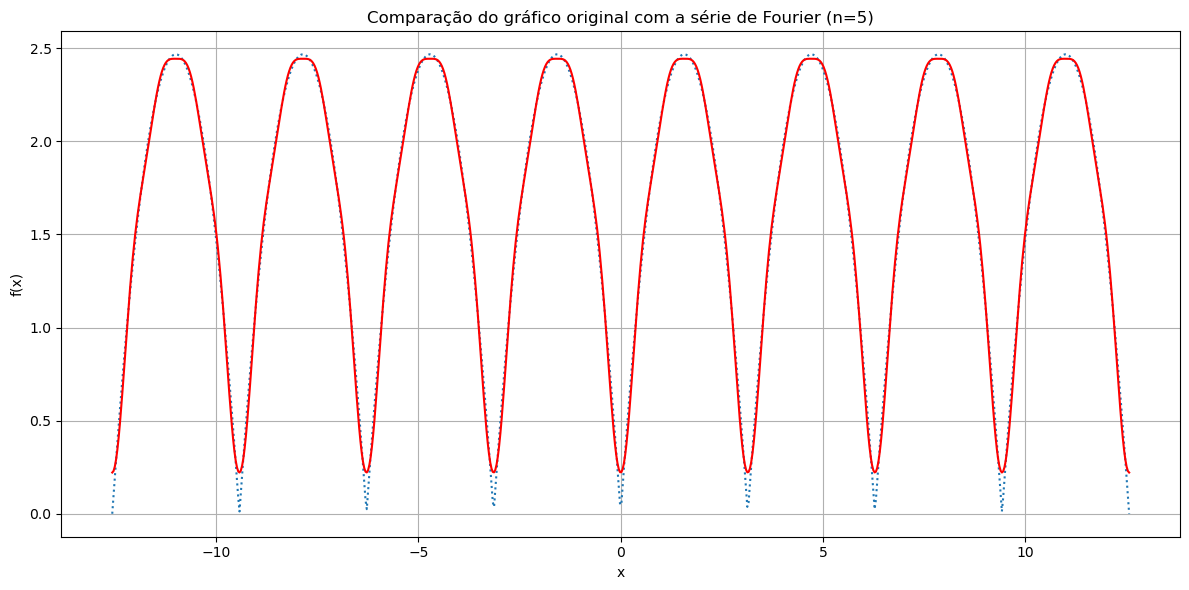

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Função periódica usando NumPy
def f_np(x):
    x = (x + L) % L
    return x*(pi-x)

# Domínio para o plot
x_np = np.linspace(-4*np.pi, 4*np.pi, 800)

# Cálculo da função original em NumPy
y_np = f_np(x_np)

# Plotando a função original e as aproximações da série de Fourier
plt.figure(figsize=(12, 6))

y_fourier_np = np.array([s.subs(x, val).evalf() for val in x_np])  # Avaliação numérica da série de Fourier
    
plt.plot(x_np, y_np, linestyle='dotted')
plt.plot(x_np, y_fourier_np, color='red')
plt.title(f"Comparação do gráfico original com a série de Fourier (n={n})")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)

plt.tight_layout()
plt.show()

#### <font color='blue'> Exemplo 11 </font>

<font color='blue'> Use o **Exemplo 10** para mostrar que $\sum_{n=1}^{\infty} \frac{1}{n^{2}} = \frac{\pi^{2}}{6}$.

##### <font color='blue'> Solução </font>

<font color='blue'> Substituindo $x = 0$ em<br><br>
 $$f(x) = \frac{\pi^{2}}{6} - \left(\frac{cos(2\pi x)}{1^{2}} + \frac{cos(4\pi x)}{2^{2}} + \frac{cos(6\pi x)}{3^{2}} + \ldots\right)$$<br>
 temos:
 $$f(0) = \frac{\pi^{2}}{6} - \left(\frac{cos(2\pi \cdot0)}{1^{2}} + \frac{cos(4\pi \cdot0)}{2^{2}} + \frac{cos(6\pi \cdot0)}{3^{2}} + \ldots\right) \Rightarrow$$<br>
 $$\Rightarrow 0(\pi-0) = \frac{\pi^{2}}{6} - \left(\frac{1}{1^{2}} + \frac{1}{2^{2}} + \frac{1}{3^{2}} + \ldots\right) \Rightarrow \frac{1}{1^{2}} + \frac{1}{2^{2}} + \frac{1}{3^{2}} + \ldots = \frac{\pi^{2}}{6} \Rightarrow \sum_{n=1}^{\infty} \frac{1}{n^{2}} = \frac{\pi^{2}}{6}.$$

# <div style="margin-top: -20px;">
<hr style="border: 2px solid black;">

<font color='black'><span style="font-size: 22px;"><strong>3.4 Teorema de Parseval</strong></span></font>

<hr style="border: 2px solid black;">
</div>

#### Teorema de Parseval

O teorema de Parseval fornece uma maneira útil de relacionar os coeficientes de Fourier com a função que eles descrevem. Ele é essencialmente uma lei de conservação que afirma:

<font color='red'>$$\frac{1}{L}\int_{-L}^{L} (f(x))^{2} dx = \frac{a_{0}^{2}}{2} + \sum_{n=1}^{\infty} (a_{n}^{2} + b_{n}^{2}) \tag{10}$$

#### <font color='blue'> Exemplo 12 </font>

<font color='blue'> Considere a série de Fourier da função $f(x) = x, \ 0 < x < 2$ (**Exemplo 8**):<br><br>
 $$f(x) = 1 + \sum_{n=1}^{\infty} \frac{4}{n^{2}\pi^{2}}(cos(n\pi)-1)cos\left(\frac{n\pi x}{2}\right)$$<br>
 Utilize a identidade de Parseval para determinar a soma da série:<br><br>
 $$\frac{1}{1^{4}} + \frac{1}{3^{4}} + \frac{1}{5^{4}} + \ldots + \frac{1}{(2n-1)^{4}} + \ldots$$

##### <font color='blue'> Solução </font>

<font color='blue'> Temos que $L = 2$, $a_{0} = 2$, $a_{n} = \frac{4}{n^{2}\pi^{2}}(cos(n\pi)-1)$ e $b_{n} = 0$. Neste caso, a identidade de Parseval é dada pela igualdade:<br><br>
 $$\frac{1}{L}\int_{-L}^{L} (f(x))^{2} dx = \frac{a_{0}^{2}}{2} + \sum_{n=1}^{\infty} (a_{n}^{2} + b_{n}^{2}) \Rightarrow \frac{1}{2}\int_{-2}^{2} x^{2} dx = \frac{2^{2}}{2} + \sum_{n=1}^{\infty} \left(\left(\frac{4}{n^{2}\pi^{2}}(cos(n\pi)-1)\right)^{2} + 0^{2}\right)\Rightarrow$$<br>
 $$\frac{1}{2}\int_{-2}^{2} x^{2} dx = \frac{2^{2}}{2} + \sum_{n=1}^{\infty} \left(\left(\frac{4}{n^{2}\pi^{2}}(cos(n\pi)-1)\right)^{2} + 0^{2}\right) \Rightarrow \frac{1}{2}\left.\frac{x^{3}}{3}\right|_{-2}^{2} = 2 + \sum_{n=1}^{\infty}\frac{16}{n^{4}\pi^{4}}(cos(n\pi)-1)^{2} \Rightarrow$$<br><br>
 $$\frac{1}{2}\left(\frac{2^{3}}{3}-\frac{(-2)^{3}}{3}\right) = 2 + \left(\frac{16}{1^{4}\pi^{4}}(-1 -1)^{2} + \frac{16}{2^{4}\pi^{4}}(1 -1)^{2} + \frac{16}{3^{4}\pi^{4}}(-1 -1)^{2} + \frac{16}{4^{4}\pi^{4}}(1 -1)^{2} + \ldots\right) \Rightarrow$$<br>
 $$\Rightarrow \frac{8}{3} = 2 + \left(\frac{16}{1^{4}\pi^{4}}\cdot4 + \frac{16}{2^{4}\pi^{4}}\cdot0 + \frac{16}{3^{4}\pi^{4}}\cdot4 + \frac{16}{4^{4}\pi^{4}}\cdot0 + \ldots\right) \Rightarrow $$<br>
 $$\Rightarrow \frac{2}{3} = \frac{64}{\pi^{4}}\left(\frac{1}{1^{4}} + \frac{1}{3^{4}} + \frac{1}{5^{4}} + \ldots \right) \Rightarrow \frac{1}{1^{4}} + \frac{1}{3^{4}} + \frac{1}{5^{4}} + \ldots = \frac{\pi^{4}}{96}$$

#### <font color='blue'> Exemplo 13 </font>

<font color='blue'> Use o **Exemplo 12** para obter a soma da série $\frac{1}{1^{4}} + \frac{1}{2^{4}} + \frac{1}{3^{4}} + \ldots + \frac{1}{n^{4}} + \ldots$

##### <font color='blue'> Solução </font>

<font color='blue'> De acordo o **Exemplo 12** temos que:<br><br>
 $$\frac{1}{1^{4}} + \frac{1}{3^{4}} + \frac{1}{5^{4}} + \ldots = \frac{\pi^{4}}{96}$$<br>
 Assim,<br><br>
 $$S = \frac{1}{1^{4}} + \frac{1}{2^{4}} + \frac{1}{3^{4}} + \frac{1}{4^{4}} + \ldots = \left(\frac{1}{1^{4}} + \frac{1}{3^{4}} + \frac{1}{5^{4}} + \ldots \right) + \left( \frac{1}{2^{4}} + \frac{1}{4^{4}} + \frac{1}{6^{4}} + \ldots\right) = $$<br>
 $$= \left(\frac{1}{1^{4}} + \frac{1}{3^{4}} + \frac{1}{5^{4}} + \ldots \right) + \frac{1}{2^{4}}\left(\frac{1}{1^{4}} + \frac{1}{2^{4}} + \frac{1}{3^{4}} + \frac{1}{4^{4}} + \ldots\right) \Rightarrow$$<br>
 $$\Rightarrow S = \frac{\pi^{4}}{96} + \frac{S}{16} \Rightarrow S - \frac{S}{16} = \frac{\pi^{4}}{96} \Rightarrow \frac{15S}{16} = \frac{\pi^{4}}{96} \Rightarrow S = \frac{\pi^{4}}{90}$$
    
 

<font color='blue'> 

# <div style="margin-top: -20px;">
<hr style="border: 2px solid black;">

<font color='black'><span style="font-size: 22px;"><strong>3.5 Notação Complexa Para Séries de Fourier</strong></span></font>

<hr style="border: 2px solid black;">
</div>

#### Forma Complexa de Uma Série de Fourier

A forma complexa da série de Fourier de uma função $f(x)$ é dada por:

<font color='red'>$$f(x) = \sum_{n = -\infty}^{\infty} c_{n}e^{\frac{in\pi x}{L}} \tag{11}$$</font>

em que

<font color='red'>$$c_{n} = \frac{1}{2L}\int_{-L}^{L} f(x)e^{\frac{-in\pi x}{L}} dx \tag{12}$$</font>

<font color='red'>$$c_{0} = \frac{1}{2L}\int_{-L}^{L} f(x)dx \tag{13}$$</font>

#### <font color='blue'> Exemplo 14 </font>

<font color='blue'> Exiba a série de Fourier complexa da função $f(x) = x, \ -2<x<2$.

##### <font color='blue'> Solução </font>

<font color='blue'> Temos que<br><br>
 $$c_{n} = \frac{1}{2L}\int_{-L}^{L} f(x) e^{-\frac{in\pi x}{L}} dx = \frac{1}{2\cdot2} \int_{-2}^{2} x e^{-\frac{in\pi x}{2}} dx = ^{[pp]} \frac{1}{4}\left(\left.\frac{2ix}{n\pi}e^{-\frac{in\pi x}{2}}\right|_{-2}^{2} -\int_{-2}^{2}\frac{2}{-in\pi}e^{-\frac{in\pi x}{2}} dx\right) =$$<br>
 $$=\frac{1}{4}\left(\left.\frac{2ix}{n\pi}e^{-\frac{in\pi x}{2}}\right|_{-2}^{2} - \left.\frac{2i}{n\pi}\frac{2}{-in\pi}e^{-\frac{in\pi x}{2}}\right|_{-2}^{2} \right) = \left.\frac{ix}{2n\pi}e^{-\frac{in\pi x}{2}}\right|_{-2}^{2} - \left.\frac{1}{n^{2}\pi^{2}}e^{-\frac{in\pi x}{2}}\right|_{-2}^{2}=$$<br>
 $$= \frac{2i}{2n\pi}e^{-\frac{in\pi\cdot2}{2}} - \frac{-2i}{2n\pi}e^{-\frac{in\pi\cdot(-2)}{2}} + \frac{1}{n^{2}\pi^{2}}e^{-\frac{in\pi\cdot2}{2}}-\frac{1}{n^{2}\pi^{2}}e^{-\frac{in\pi\cdot(-2)}{2}} = $$<br>
 $$= \left(\frac{i}{n\pi} + \frac{1}{n^{2}\pi^{2}} \right)e^{-in\pi} + \left(\frac{i}{n\pi} - \frac{1}{n^{2}\pi^{2}} \right)e^{in\pi} =$$<br>
 $$= \left(\frac{i}{n\pi} + \frac{1}{n^{2}\pi^{2}} \right)(cos(n\pi)-isen(n\pi)) + \left(\frac{i}{n\pi} - \frac{1}{n^{2}\pi^{2}} \right)(cos(n\pi) + isen(n\pi)) =$$<br>
 $$= (Ai+B)(C-iS) + (Ai-B)(C+iS) = ACi + AS + BC -BSi + ACi-AS-BC-BSi = $$<br>
 $$= 2ACi - 2BSi = \frac{2i}{n\pi}cos(n\pi) -\frac{2i}{n^{2}\pi^{2}}sen(n\pi)$$<br>
 Considerando $n = 1, 2,...$ temos que $sen(n\pi) = 0$ e $cos(n\pi) = (-1)^{n}$ donde segue que:<br><br>
 $$= c_{n} = \frac{2i}{n\pi}(-1)^{n}$$<br>
 Para finalizar vejamos o cálculo de $c_{0}$:<br><br>
 $$c_{0} = \frac{1}{2L}\int_{-L}^{L} x dx = \frac{1}{2\cdot2}\int_{-2}^{2} x dx = \left.\frac{1}{4}\frac{x^{2}}{2}\right|_{-2}^{2} = 0$$<br>
 Finalmente,<br><br>
 $$f(x) = \sum_{n = -\infty, \neq 0}^{\infty} \frac{2i(-1)^{n}}{n\pi}e^{\frac{in\pi x}{2}}.$$<br>
 Embora não tenhamos um código completo para o cálculo da série de Fourier complexa em sua forma algébrica, podemos calcular seus coeficientes da seguinte forma:

In [17]:
import sympy as sp

# Definindo as variáveis
x, n = sp.symbols('x n', real=True)

# Definindo a função
f = x

# Período da função
L = 2

# Fórmula do coeficiente da série de Fourier complexa
c_n = (1/(2*L)) * sp.integrate(f * sp.exp(-sp.I * n * sp.pi  * x /L), (x, -2, 2))

# Calcular os coeficientes para diferentes valores de n
coeficientes = {ni: c_n.subs(n, ni).evalf() for ni in range(-10, 11)}

for ni, coef in coeficientes.items():
    print(f"c_{ni} = {coef}")


c_-10 = 0.e-23 - 0.0636619772367581*I
c_-9 = 0.e-23 + 0.0707355302630646*I
c_-8 = 0.e-23 - 0.0795774715459477*I
c_-7 = 0.e-23 + 0.0909456817667973*I
c_-6 = 0.e-23 - 0.106103295394597*I
c_-5 = 0.e-22 + 0.127323954473516*I
c_-4 = 0.e-22 - 0.159154943091895*I
c_-3 = 0.e-22 + 0.212206590789194*I
c_-2 = 0.e-22 - 0.318309886183791*I
c_-1 = 0.e-21 + 0.636619772367581*I
c_0 = 0
c_1 = 0.e-21 - 0.636619772367581*I
c_2 = 0.e-22 + 0.318309886183791*I
c_3 = 0.e-22 - 0.212206590789194*I
c_4 = 0.e-22 + 0.159154943091895*I
c_5 = 0.e-22 - 0.127323954473516*I
c_6 = 0.e-23 + 0.106103295394597*I
c_7 = 0.e-23 - 0.0909456817667973*I
c_8 = 0.e-23 + 0.0795774715459477*I
c_9 = 0.e-23 - 0.0707355302630646*I
c_10 = 0.e-23 + 0.0636619772367581*I


# <div style="margin-top: -20px;">
<hr style="border: 2px solid black;">

<font color='black'><span style="font-size: 22px;"><strong>Exercícios</strong></span></font>

<hr style="border: 2px solid black;">
</div>

#### Exercício 1$^{[3]}$

Considere a função *square-wave*

$$f(x) = \left\{ \begin{array}{}
-1 &  -\frac{T}{2} \leq x < 0 \\
+1 & \ \ \ 0 \leq x < \frac{T}{2} \end{array}\right. \ \ \ \text{Período} = T$$

Escreva a série de Fourier correspondente à função square-wave.

#### Exercício 2$^{[3]}$

Exiba a série de Fourier de $f(x) = x^{2}$ para $-2\leq x \leq 2$.

#### Exercício 3$^{[3]}$

Pode-se mostrar que a diferenciação e integração de uma série de Fourier pode ser feita termo a termo. Considere a série de Fourier obtida no **Exercício 2**:

$$f(x) = x^{2} = \frac{4}{3} + 16\sum_{n=1}^{\infty} \frac{(-1)^{n}}{n^{2}\pi^{2}}cos\left(\frac{n\pi x}{2}\right)$$

a) Derive a série de Fourier associada a $f(x)$.

b) Integre a sérei de Fourier associada a $f(x)$.

c) Manipule as respostas dos itens "a" e "b" para deduzir a série de Fourier associada à função $g(x) = x^{3}$.

#### Exercício 4$^{[3]}$

a) Exiba a série de Fourier da função $f(x) = x, \ -\pi < x \leq \pi$.

b) Use o item "a" para mostar que

$$1 - \frac{1}{3} + \frac{1}{5} - \frac{1}{7} + \ldots = \frac{\pi}{4}.$$

#### Exercício 5$^{[6]}$

Prove que

a) $\int_{-L}^{L} sen\left(\frac{n\pi x}{L}\right) dx = \int_{-L}^{L} cos\left(\frac{n\pi x}{L}\right) dx \ \ \text{se} \ \ n = 1,2,3, \ldots$

b) $\int_{-L}^{L} cos\left(\frac{m\pi x}{L}\right)cos\left(\frac{n\pi x}{L}\right) dx = \int_{-L}^{L} sen\left(\frac{m\pi x}{L}\right)sen\left(\frac{n\pi x}{L}\right) dx =
\left\{\begin{array}{}
0 & m \neq n \\
L & m = n \\
\end{array}\right. \ \ m,n \in \left\{1,2,3,\ldots \right\}$

c) $\int_{-L}^{L} sen\left(\frac{m\pi x}{L}\right)cos\left(\frac{n\pi x}{L}\right) dx = 0, \ \ m,n \in \left\{1,2,3,\ldots \right\}$

#### Exercício 6$^{[6]}$

a) Desenvolva $f(x) = sen(x), \ 0 < x < \pi$, em série de Fourier de cossenos.

b) Use o item "a" para mostrar que $\sum_{n=1}^{\infty} \frac{1}{4n^{2}-1} = \frac{1}{2}$.

#### Exercício 7$^{[6]}$

Considere as seguintes expansões da função $f(x) = x(\pi-x), \ 0 \leq x \leq \pi$:

i) $x(\pi-x) = \frac{\pi^{2}}{6} - \left(\frac{cos(2x)}{1^{2}} + \frac{cos(4x)}{2^{2}} + \frac{cos(6x)}{3^{2}} + \ldots \right)$

ii) $x(\pi-x) = \frac{8}{\pi}\left(\frac{sen(x)}{1^{3}} + \frac{sen(3x)}{3^{3}} + \frac{sen(5x)}{5^{3}} \right)$

a) Utilize a série "i" para mostrar que $\sum_{n=1}^{\infty} \frac{(-1)^{n-1}}{n^{2}} = \frac{\pi^{2}}{12}$.

b) Utilize a série "ii" para mostrar que $\sum_{n=1}^{\infty} \frac{(-1)^{n-1}}{(2n-1)^{3}} = \frac{\pi^{3}}{32}$.

# <div style="margin-top: -20px;">
<hr style="border: 2px solid black;">

<font color='black'><span style="font-size: 22px;"><strong>Respostas dos Exercícios</strong></span></font>

<hr style="border: 2px solid black;">
</div>

#### Resposta do Exercício 1

$$f(x) = \frac{4}{\pi}\left(sen\left(\frac{2\pi x}{T}\right) + \frac{1}{3}sen\left(\frac{6\pi x}{T}\right) + \frac{1}{5}sen\left(\frac{10\pi x}{T}\right) + \ldots\right)$$

#### Resposta do Exercício 2

$$x^{2} = \frac{4}{3} + 16\left(-\frac{1}{\pi^{2}}cos\left(\frac{\pi x}{2} \right) + \frac{1}{4\pi^{2}}cos\left(\frac{2\pi x}{2} \right) - \frac{1}{9\pi^{2}}cos\left(\frac{3\pi x}{2}\right) + \ldots \right) =$$
$$ = \frac{4}{3} + 16\sum_{n=1}^{\infty} \frac{(-1)^{n}}{n^{2}\pi^{2}}cos\left(\frac{n\pi x}{2}\right)$$

#### Resposta do Exercício 3

a) $f'(x) = 2x = -8\sum_{n=1}^{\infty} \frac{(-1)^{n}}{n^{2}\pi^{2}} sen\left(\frac{n\pi x}{2}\right)$

b) $\int f(x) dx = \frac{4}{3}x + 32\sum_{n=1}^{\infty} \frac{(-1)^{n}}{n^{3}\pi^{3}}sen\left(\frac{n\pi x}{2} \right) + c$ (Tome $c = 0$ pois $0^{3} = 0$).

c) $g(x) = x^{3} = \sum_{n=1}^{\infty} (-1)^{n} \left(\frac{96}{n^{3}\pi^{3}} -\frac{16}{n\pi} \right)sen\left(\frac{n\pi x}{2}\right)$

#### Resposta do Exercício 4

a) $x = 2\left(sen(x) - \frac{sen(2x)}{2} + \frac{sen(3x)}{3} - \frac{sen(4x)}{4} + \ldots \right) = 2\sum_{n=1}^{\infty} \frac{(-1)^{n+1}}{n}sen(nx)$

b) Aplique $\frac{pi}{2}$ aos dois membros da resposta obtida no item "a".

#### Resposta do Exercício 5

Calcule as integrais.

#### Resposta do Exercício 6

a) $f(x) = \frac{2}{\pi} - \frac{4}{\pi}\left(\frac{cos(2x)}{2^{2}-1} + \frac{cos(4x)}{4^{2}-1} + \frac{cos(6x)}{6^{2}-1} + \ldots \right)$

b) Aplique $0$ aos dois mebros da resposta obtida no item "a".

#### Resposta do Exercício 7

a) Aplique $\frac{\pi}{2}$ a ambos membros da série "i".

b) Aplique $\frac{\pi}{2}$ a ambos membros da série "ii".

# <div style="margin-top: -20px;">
<hr style="border: 2px solid black;">

<font color='black'><span style="font-size: 22px;"><strong>Vídeo Aulas</strong></span></font>

<hr style="border: 2px solid black;">
</div>

Clicando nos links a seguir você será redirecionado às aulas referentes a este capítulo:

[Funções Periódicas](https://youtu.be/JGT7COhXwSg)

[Esboço Gráfico de Funções Periódicas](https://youtu.be/5oVIGDDOj2U)

[Introdução a Série de Fourie](https://youtu.be/rs4bHjmUDsw)

[Exemplo Envolvendo a Série de Fourier](https://youtu.be/ME6gExRnr_A)

[Condições de Dirichlet](https://youtu.be/7sxEQmFjrA8)

[Exemplo Envolvendo a Série de Fourier](https://youtu.be/7My2wLJWDuQ)

[Funções Pares e Funções Ímpares](https://youtu.be/5-ZLJldt9GM)

[Teorema 1 Sobre Funções Pares e Funções Ímpares](https://youtu.be/Mipzj4Szfho)

[Teorema 2 Sobre Funções Pares e Funções Ímpares](https://youtu.be/q0QU5r2vLTE)

[Teorema 3 Sobre Funções Pares e Funções Ímpares](https://youtu.be/INW3B35vnMs)

[Série de Fourier Associada à Extensão Ímpar de Uma Função](https://youtu.be/oUY0OB_tydo)

[Série de Fourier Associada à Extensão Par de Uma Função](https://youtu.be/WPIrOA0woOY)

[Funções Simétricas](https://youtu.be/CgSVr-jUCNE)

[Exemplo de Série de Fourier de Uma Função Simétrica](https://youtu.be/R7n1F3btOXU)

[Exemplo de Soma de Uma Série Usando Séries de Fourier](https://youtu.be/sgJbROh2l0I)

[Teorema de Parseval Para Séries de Fourier](https://youtu.be/7x9l17axBqM)

[Exemplo de Cálculo do Valor de Uma Série](https://youtu.be/08DaV8eFKYM)

[ Série de Fourier na Forma Complexa](https://youtu.be/5vM3rNEyaRI)

# <div style="margin-top: -20px;">
<hr style="border: 2px solid black;">

<font color='black'><span style="font-size: 22px;"><strong>Referências</strong></span></font>

<hr style="border: 2px solid black;">
</div>

$[0]$ Bibliografia constante no Projeto Pedagógico do Curso de Engenharia Elétrica 2023.

$[1]$ FERNANDEZ, C. de S.; BERNANDES JÚNIOR, N. Introdução às funções de uma variável complexa. Rio de Janeiro: SBM, 2016.

$[2]$ BUTKOV, E. Física matemática. Rio de Janeiro: LTC, 1988.

$[3]$ RILEY, K. F.; HOBSON, M. P.; BENCE, S. J. Mathematical methods for physics and engineering. 3rd ed. Cambridge: Cambridge University Press, 2006.

$[4]$ SANTOS, R. J., Transformada de Fourier. Belo Horizonte: Universidade Federal de Minas Gerais, 2017.

$[5]$ SOARES, A. Curso Python Com Jupyter Notebook. Instituto Federal da Bahia, Campus Vitória da Conquista, $2023$. Disponível em https://github.com/ProfAllanIFBA/Curso_Python_Com_Jupyter_Notebook

$[6]$ SPIEGEL, M. R. Advanced mathematics for engineers and scientists. New York: McGraw-Hill, 1971.

$[7]$ SPIEGEL, M. R. Cálculo Avançado. São Paulo: McGraw-Hill, 1971.

$[8]$ ZILL, D. G.; CULLEN, M. R. Matemática avançada para engenharia, v.3: equações diferenciais parciais, métodos de Fourier e variáveis complexas. 3 ed. Porto Alegre: Bookman, 2009.

$[9]$ ZILL, D. G., Advanced Engineering Mathematics. 6rd ed. Jones & Bartlett Learning 2017.

$[10]$ ZILL, D. G., CULLEN, M. R. Equações Diferenciais. v1, 3 ed. São Paulo: Makron Books, 2001.